# Final Project Submission

Please fill out:
* **Student name:** Shayan Abdul Karim Khan
* **Student pace:** Self Paced
* **Scheduled project review date/time:** 
* **Instructor name:** Abhineet Kulkarni
* **Blog post URL:** 


## Problem Overview

#### Venture Opportunity:
A lot of companies are producing original video content generating huge revenues, including box office movies. In the post-pandemic world, people have filled theaters and cinema halls allowing top movies to rack up millions in box office revenues.

#### Client Insight:


Microsoft has decided to venture into the world of movie production with a new movie studio. In order to make the movie studio a success, Microsoft needs to understand what kind of movies to produce. 

#### Client Goals:


This notebook focuses on three client goals:
1. Positive viewer response
2. Impactful market entry
3. Profitable 


#### Business Questions

This notebook will focus on three business questions to help achieve the client's goals. There are **three** business questions that this notebook will recommend answers to:

1. Which genres to focus on?
    - The popular genres will identify what type of movie will receive positive viewer responses
    
*It is important to understand the customer base and how different factors influence their behavior. Any product should primmarily be focused on providing the customer with whata they need. This guarantees success in the long run and develops customer loyalty. Customer satisfaction is directly correlated with profits and better reviews which will allow long-term success.*
<br>



2. Should the movie be launched internationally?
    - The international launch of the movie will help the client in the future with regards to an impactful market entry. If the movie needs to be launched internationally, it will need to have a cast, crew, story, advertising and marketing plans made accordingly. Whereas a only a US specific production would require different plans.
<br>


3. What should be the expected budget/initial investment?
    - The financial aspects will help identify how successful the business side will be. It is important to remember that a movie can be very popular but if it's not adequately profitable, it will be difficult for the movie studio to continue operations.
<br>






#### Value Proposition:


This notebook will look at multiple sources of data to understand what will allow Microsoft to generate the most promising content and set it up for long-term success. The strategy described below will be used to generate actionable insight to answer the **Business Questions** based on two main criterion:
<br>
1. *Movie Reviews*
2. *Movie Profits*


## Strategy

To answer the complex question of the secret ingredients of a successful movie, there are a myriad of aspects to consider. The different aspects analyzed in this notebook will be evaluated based on the two KPIs listed above; Profits and reviews. 

Good **Movie Reviews** are important indicators of the quality of a movie nonetheless they can not solely justify an investment opportunity. Therefore **Movie Profits** will be used as an indicator of high potential investment opportunities. The two KPIs coupled together can give the client a more thorough lay of the land. 

These KPIs will be used to answer the three main business questions in the following manner:

1. Which genres to focus on?
    - genre vs average reviews analysis
    - genre vs profit analysis
    - genre vs average reviews vs profit analysis
<br>


2. Should the movie be launched internationally?
    - genre vs domestic profit analysis
    - genre vs foregin profit analysis
<br>


3. What should be the expected budget/initial investment?
    - genres vs production budget vs domestic & foreign profits analysis


## Data Sources

To solve the problem, 5 data sources have been gathered. These data sources will be investigated to identify which data will be helpful in the analysis. The data sources are listed below:

- **[Box Office Mojo](https://www.boxofficemojo.com/)**

- **[The Numbers](https://www.the-numbers.com/)**

- **[Rotten Tomatoes](https://www.rottentomatoes.com/)**

- **[IMDB](https://www.imdb.com/)**

- **[TheMovieDB](https://www.themoviedb.org/)**



The content and relevance of the data avaialble is dealt with in detail in the **Data Understanding** Section.

## Data Understanding

The data dources listed have the following characteristics discussed in this section:

- Contents of the datasets
- Features of the datasets
- Relevance of the datasets to the project
- Relevant features of the datasets that will be used for analysis
- Relation between the different datasets
- Limitations of the datasets
- Avenues of analysis that will be pursued


### Importing Python Libraries

We will start by importing the appropriate python libraries to explore the datasets.

In [388]:
import pandas as pd #imports the pandas library as pd to work on databases
import sqlite3 as sql # imports the sqlite3 library to leverage sql with pandas
from pandasql import sqldf # imports pandas sql library
import matplotlib.pyplot as plt # importing matplotlib for visualizations 
%matplotlib inline 
import numpy as np # imports the numpy library
import datetime as dt #import datetime module
import seaborn as sns #import seaborn

In [389]:
#lambda function for sqldf for use later
pysqldf = lambda q: sqldf(q, globals())

### Importing and Storing Data

#### Box Office Mojo Dataset

The **Box Office Mojo** dataset is stored in the `zippedData` folder. 

The file is called `bom.movie_gross.csv.gz`.

We can see from the extension that this dataset is a `CSV` file therefore we will use the `read_csv()` function of pandas to explore this dataset.

In [390]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz') # reading the data and converting to a dataframe

bom_df.head() # Previewing the data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Lets look at the overview of the data frame using the `.info()` function

In [391]:
bom_df.info() # getting the overvieww info of the dataframe records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


There are **five** columns excluding the index column:

- `title` : This is the movie title. It is an important column because it shows which movie the record is for. This will be valuable in comparing/merging data to give more context to the analysis.
<br>

- `studio` : This gives an outlook on the competitors in the market. This won't be valuabale in answering any of the three business questions.
<br>

- `domestic_gross` : This data is particularly important because it provides the financial overview within the US market. Since there is no currency sign associated, we will assume `$` but more on that in the **Data Prepartion** section.
<br>

- `foreign_gross` : This is similar to `domestic gross` and equally valuable. It provides insights on foreign performance of a movie.
<br>

- `year` : This is the year that the movie was released. It is important to keep the year in mind so that the analysis isn't skewed. We will later evaluate which timelines to focus on for the analysis.

There are `3387` records in total in this dataset which is a good size for our analysis. 

Nonetheless, lets explore the distribution of the `year` column to understand the spread of the data to ensure that the timeline we want to look isn't skewed.

In [393]:
#get the counts for the unique values in the year column
bom_unique_value_counts = bom_df['year'].value_counts(sort=False) 

print(bom_unique_value_counts) #print the values

2010    328
2011    399
2012    400
2013    350
2014    395
2015    450
2016    436
2017    321
2018    308
Name: year, dtype: int64


We can see that the data is between **2010** and **2018** with a very good distribution. This allows us to choose our timelines without fear of loosing data or skewing the results.

Referring back to the `.info()`, this dataset has some values missing.

- `studio` column has 5 missing values which we can drop since it will have an insignificant on impact the total number of records but we will take a look at the records we are dropping in the **Data Preparation** section.
<br>

- `foreign gross` column has more than 1000 missing values. We will correlate this with data we find from other datasets to understand whether these movies weren't launched in foregin markets or is there a gap in our data. We will explore this more in the **Data Preparation** section.

**Summary:** 

The **Box Office Mojo** data will be very valuable in the financial analysis.

#### The Numbers Dataset

This dataset is stored in the `zippedData` folder. 

The file is called `tn.movie_budgets.csv.gz`.

We can see from the extension that this dataset is a `CSV` file therefore we will use the `pd.read_csv()` function of pandas to explore this dataset.

In [394]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz') # reading the data and converting to a dataframe

tn_df.head() # Previewing the data

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Lets continue to explore further with the `.info()` function

In [395]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


There are **six** columns in this dataset with a total of `5782` records with no missing values.

Lets explore the id column to understand more about it

In [396]:
# getting the counts for the unique values in the id column
tn_df['id'].value_counts() 

1      58
63     58
61     58
60     58
59     58
       ..
86     57
85     57
84     57
83     57
100    57
Name: id, Length: 100, dtype: int64

It is difficult to guage what the `id` column is doing in this dataset. We should be able to drop this column since it doesn't signify anything unique. This will be done in the **Data Preparation** section.

Lets check whether the `worldwide_gross` column is a sum of `domestic_gross` and foreign revenue or does it only signify foreign revenue. For this we will compare values of the same movies between `bom_df` and `tn_df`

In [397]:
# extracting the Avengers record of tn_df
avengers_tn = tn_df.iloc[3] 

# extracting the Avengers record of bom_df by setting
# the index to title and searching for the specific title

avengers_bom = bom_df.set_index('title').loc['Avengers: Age of Ultron'] 

# printing the respective records
print('tn_df avengers record:\n', avengers_tn)
print('\nbom_df avengers record:\n', avengers_bom)

tn_df avengers record:
 id                                         4
release_date                     May 1, 2015
movie                Avengers: Age of Ultron
production_budget               $330,600,000
domestic_gross                  $459,005,868
worldwide_gross               $1,403,013,963
Name: 3, dtype: object

bom_df avengers record:
 studio                     BV
domestic_gross    459000000.0
foreign_gross       946400000
year                     2015
Name: Avengers: Age of Ultron, dtype: object


The `tn_df` records have more significant figures than the `bom_df` record. Lets round off the sum and see whether they are similar.

In [400]:
# convert the bom_df record to integer data type
avengers_bom['domestic_gross'] = int(avengers_bom['domestic_gross'])
avengers_bom['foreign_gross'] = int(avengers_bom['foreign_gross'])

# replace the tn_df record string components "," and "$"
avengers_tn['worldwide_gross'] = avengers_tn['worldwide_gross'].replace(',','' ).replace('$','')

#convert tn_df record to integer
avengers_tn['worldwide_gross'] = int(avengers_tn['worldwide_gross'])
                                                                       
#round off the numbers to the nearest million
x1 = round(avengers_bom['domestic_gross'] + avengers_bom['foreign_gross'], -8)
x2 = round(avengers_tn['worldwide_gross'],-8)

#check if the values are the same
x1 == x2                                                                       
# round(avengers_bom['domestic_gross'].astype('int32') 
#       + int(avengers_bom['foreign_gross']),-8) 
# == round(int(avengers_tn['worldwide_gross'].replace(',','' ).replace('$','')), -8)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/1622941681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avengers_tn['worldwide_gross'] = avengers_tn['worldwide_gross'].replace(',','' ).replace('$','')
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/1622941681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avengers_tn['worldwide_gross'] = int(avengers_tn['worldwide_gross'])


True

From the above True statement we can deduce that the `worldwide_gross` in `tn_df` is indeed the sum of `domestic_gross` and `foreign_gross` of the `bom_df` dataframe.

With that in mind, a brief overview of the columns of interest in the `tn_df` dataframe is as follows:


- `release_date` : This is the release date of the movie and will be valuable in determining if we wwant to limit the timeline of the dataset we use.
<br>

- `movie` : This is the movie name which shows which movie the record is for.
<br>

- `production_budget` : This column is important in understanding the initial investments that have to be made by the client. This will also allow us to calculate the net profits.
<br>

- `domestic-gross` : Similar to `bom_df`, this column provides insight into the revenue generated in the US market by the movie.
<br>

- `worldwide-gross` : This is slightly different than the `foreign_gross` column of `bom_df` because it adds up the domestic gross of the movie and provides the total revenue for the movie.

An important thing to note is that `tn_df` has `5782` records while `bom_df` has `3378`. 


**Summary:** 

`tn_df` has similar data bins (i.e. columns) as `bom_df` but more records. Considering that `tn_df` has more records and a complete dataset, therefore it would be better to use this dataset for analysis.

`tn_df` will be the main dataset we will be using to conduct financial analysis.

#### Rotten Tomatoes Dataset

There are 2 datasets from Rotten Tomatoes that we are going to explore and understand their utility for our analysis.

- `rt.movie_info.tsv`
- `rt.reviews.tsv`

Both of these files are stored in the `zippedData` folder.

We can see from the file extensions that these datasets are `TSV` (tab separated values) files. We will use the same `.read_csv()` function with the parameter `sep = '\t'`.

In [401]:
# store the rotten tomatoes movie info dataset in a pandas dataframe
rtmov_df = pd.read_csv('zippedData/rt.movie_info.tsv', '\t')

#previewing the dataframe
rtmov_df.head()


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [402]:
# store the rotten tomatoes reviews datset in a pandas dataframe
rtrev_df = pd.read_csv('zippedData/rt.reviews.tsv', '\t', encoding='windows-1252')

#previewing the dataframe
rtrev_df.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Lets continue to explore further with the `.info()` function

In [403]:
print(rtmov_df.info(),'\n')
print('\n', rtrev_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      

The two datasets are related through the id column as shown below. Since there are multiple reviews for movies, we see a big discrepancy between the total number of records between the two datasets.

`rtmov_df` has `1560` records

`rtrev_df` has `54432` records

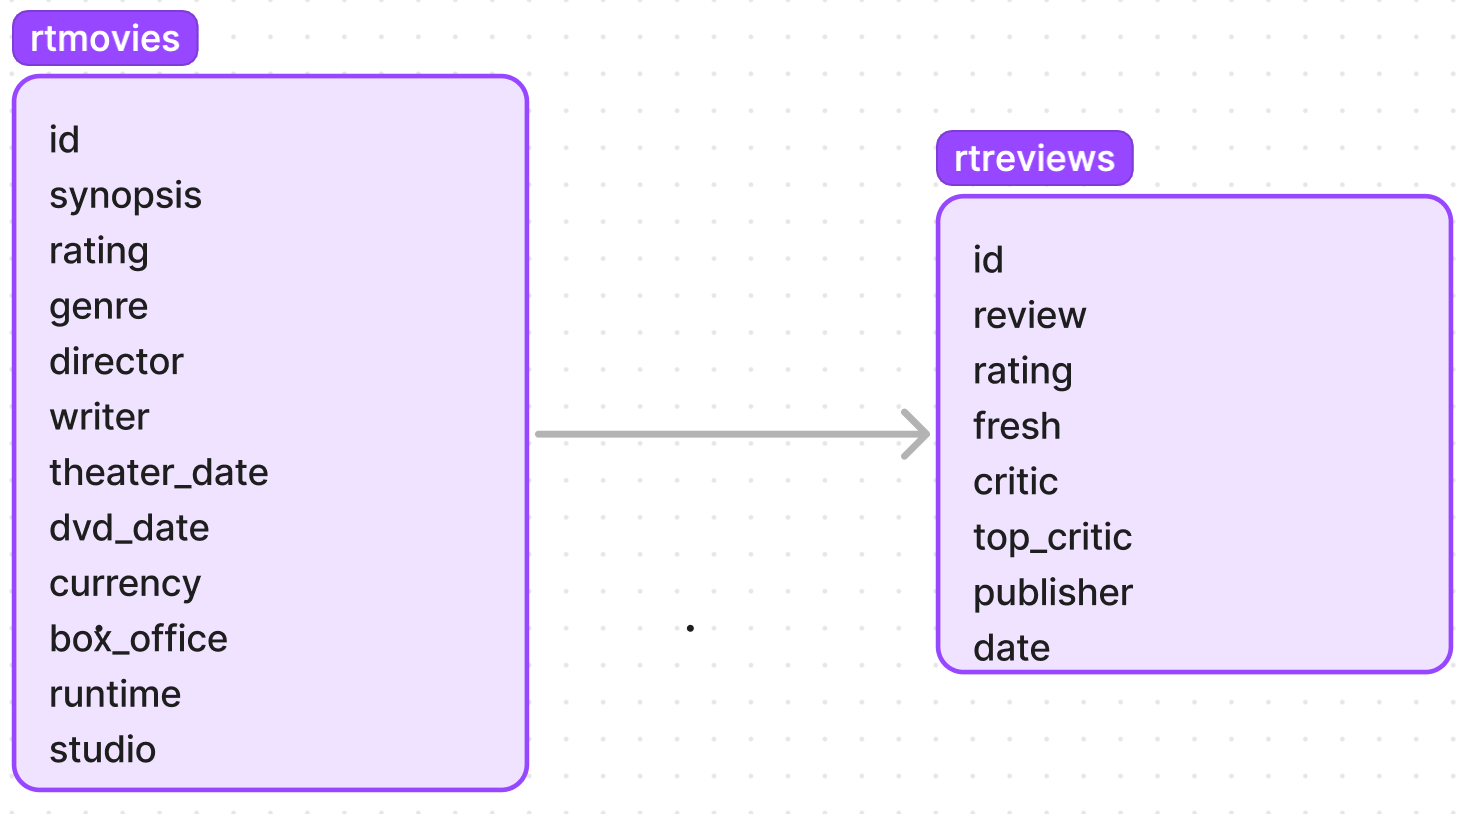

Since there is no information on the movie name that these records are for, it becomes very difficult to join/compare this data with other datasets. 

Note that the `rating` columns in the two dataframes show different data. The one in `rtmov_df` is to signify what age group the movie was for (eg. R, PG13, etc) whereas the one in `rtrev_df` is the movie review on a scale of 0 to 5.

The columns of interest are described below:

- `id` : This is the key column in both dataframes. We will be using this column to join the dataframes.
<br>

- `rtmov_df` `rating` : This column contains information on the age group that the movie was released for. For example R-rated movies have age restrictions. This will be valuable in understanding the demographic of the users.
<br>

- `rtmov_df` `genre` : This column provides an insight into what genre the movie was. Comparing this column with `rating` and `reviews` will showcase which genres are highly competetive and which ones are low performingor have high standards.
<br>

- `rtrev_df` `rating`: This column stores the ratings reviewers gave the movie out of 5. This data will be used as the basepoint to compare what type of movies are successful. This column will be renamed to avoid confusion with the `rtmov rating` data.


An important thing to note is that the **Rotten Romatoes** data only has `1560` movie records. This is much smaller than the other two data sources we have looked at. 

Therefore, if we find a dataset with similar information but more records, we will ignore this dataset. 

**Summary:** 

While this data is valuable for **Customer Influence** analysis, we need to look at the other datasets before deciding how critical the rotten tomatoes data will be.

#### IMDB Database

The **IMDB** Database is stored in the `zippedData` folder.

The file is called `im.db`.

We have the following Entity Relationship Diagram (ERD) explaining the different tables in the database:

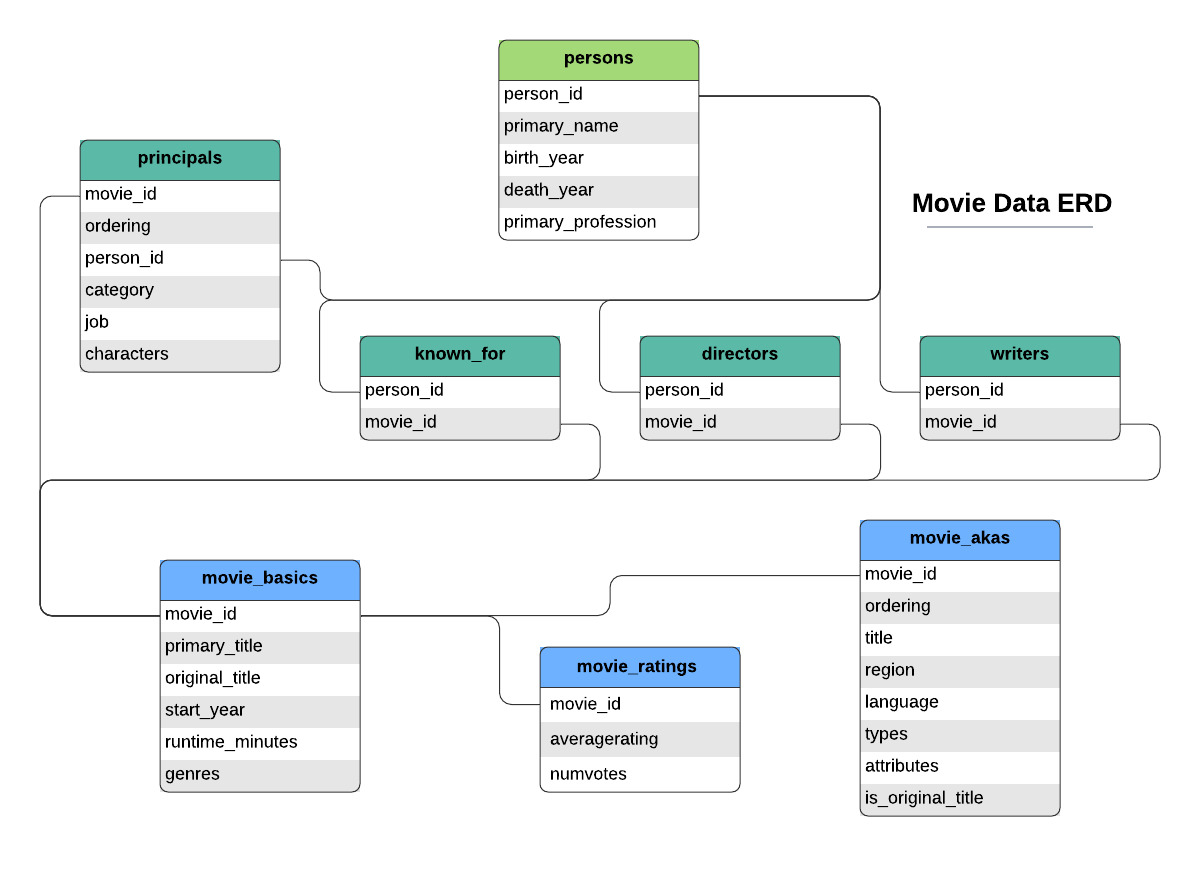

Lets explore the tables of the database. We will start with `persons`.

In [18]:
conn = sql.connect('zippedData/im.db') # making a conenction to the database

In [404]:
# writing the sql query for the persons table
q1 = """
SELECT *
FROM persons
"""

# querying the persons table and storing it in a dataframe
im_persons_df = pd.read_sql(q1,conn)

# previewing the data and table info
print(im_persons_df.info())
im_persons_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
None


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


These are the records for the cast and crew of the movies which are not relevant to the business questions that this notebook explores. 

Nonetheless, this is something that should be investigated separately. Alongside this data, experts in the field of movie production should be consulted to understand which cast and crew would be ideal for the kind of movie that the client decides to pursue.

Leveraging the **ERD** above, we can skip exploring `writers`, `directors`, `principals` and `known_for` tables because these are information about the cast and crew.

We can move on to exploring the `movie_basic` table.

In [405]:
# writing the sql query for the movie_basics table
q2 = """
SELECT *
FROM movie_basics
"""

# querying the table and storing it in a dataframe
im_movbas_df = pd.read_sql(q2,conn)

# previewing the data and table info
print(im_movbas_df.info())
im_movbas_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This is one of the most important tables in this database. It stores the primary information about the movies.

It has **six** columns, all with valuable information, with `146144` records. This will improve the analysis.

- `movie_id` : This is the primary key of the table. It can be seen in the ERD that it relates to the other tables based on this id.
<br>

- `primary_title` : This column represents the changed title for different markets. These can be translations if the movie is a foreign production. A lot of movies are released with different names in different regions. This might end up not being a useful column for analysis but further exploration will calrify that.
<br>

- `original_title` : This column is self-explanatory. It has the original title of the movie in the local language of the region it was prooduced in. This will be important to link to the other datasets and other tables within the database.
<br>

- `start_year` : This is the year that the movie was launched. This will be important to filter the records for the timeline being evaluated.
<br>

- `runtime_minutes` : This column contains the data on the total length of the movie. This data does not contribute to the business questions being answered.
<br>

- `genres` : This column contains the genres of the movie. This will be critical in our analysis to understand which genres should the client focus on.

There are some columns with missing data for some columns but they are small in number as compared to the overall records and we should be able to adjust the dataframe for effective usage in the **Data Preparation** section.

Before we move on to the next table, lets explore the range and spread of `start_year` to understand what timeline data we have available.

In [406]:
im_movbas_df['start_year'].value_counts(sort = False) #exploring the unique value counts in the start_year column

2013    14709
2019     8379
2018    16849
2017    17504
2012    13787
2010    11849
2011    12900
2015    16243
2021       83
2016    17272
2014    15589
2020      937
2022       32
2023        5
2024        2
2026        1
2025        1
2115        1
2027        1
Name: start_year, dtype: int64

- There is a good spread from 2010 - 2019.

- There is very few data available for 2020-2022 as compared to 2010-2019. 

- This column will be filtered based on the years we have financial data available.

- There also seem to be some outlandish years in there which we will drop.

**Summary:** 

The `movie_basics` table give us the principal information about the movies that will be used for joining and relating with other tables. It will be important to use this table in analysis to relate reviews and profits to genres.

Lets explore the `movie_ratings` table.

In [407]:
# writing the sql query for the movie_ratings table
q3 = """
SELECT *
FROM movie_ratings
"""

# querying the table and storing it in a dataframe
im_movrat_df = pd.read_sql(q3,conn)

# previewing the data and table info
print(im_movrat_df.info())
im_movrat_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


This is the dataframe storing the average reviews for the movies and the corresponding total number of votes for each movie. 

Nonetheless, it only has `73856` records compared to `movie_basics` `146144` records. Only movies that have reviews data will be used in the analysis.

These reviews can be correlated with the genres of the movies from `movie_basics` using the `movie_id` column. This will give us a good comparison of genres vs reviews.

These can be further analysed with profits for every movie, resulting in a genres vs reviews vs profits comparison.


This dataframe has **three** columns:

- `movie_id` : This is the key that is relating this table to the `movie_basics` table.
<br>

- `averagerating` : This is the average of all the ratings for a specific movie.
<br>

- `numvotes` : This is the total number of reviews that a movie received. It will be important to set a baseline of minimum number of votes to use for filtering the data to avoid skewwing results.

**Summary:** 

This table will be extremely valuable in **Customer Influence** analysis and deriving recommendations for which type of movie should the client pursue.

Moving on to the other table related to `movie_basics` in the ERD, `movie_akas`.

In [408]:
# writing the sql query for the movie_akas table
q4 = """
SELECT *
FROM movie_akas
"""

# querying the table and storing it in a dataframe
im_movaka_df = pd.read_sql(q4,conn)

# previewing the data and table info
print(im_movaka_df.info())
im_movaka_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB
None


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


This is a relatively large dataframe with `331703` records. This is because the `title` column has separate names that movies had in different regions. 

We will use the laanguage column to identify which movies were produced for most of the US population. 

Using **English** as the baseline laanguage will allow the movie to have the greatest reach in doemstic and international markets.

Lets explore whether `types` and `attributes` column will be useful for our analysis.

In [409]:
im_movaka_df['types'].value_counts() # exploring the unique value counts in the types column

imdbDisplay         100461
original             44700
working               8680
alternative           6564
festival              3307
dvd                   2995
tv                    1617
video                  121
dvdimdbDisplay          1
festivalworking         1
Name: types, dtype: int64

In [410]:
im_movaka_df['attributes'].value_counts() # exploring the unique value counts in the attributes column

new title                      1700
alternative spelling           1394
literal English title          1054
complete title                 1034
original subtitled version      879
                               ... 
8mm release title                 1
reissue titleshort version       1
first season title                1
TV listings title                 1
X-rated version                   1
Name: attributes, Length: 77, dtype: int64

Looks like both of these columns won't be of any use in our analysis so we'll drop them later. 

Lets take a look at how many original titles we have and which regions they belong to

In [411]:
im_movaka_df.value_counts('is_original_title') # checking the value_counts because there are only 0 and 1 values

is_original_title
0.0    286978
1.0     44700
dtype: int64

In [412]:
# filtering for original titles
im_movaka_df[im_movaka_df['is_original_title'] == 1.0]

,movie_id,ordering,title,region,language,types,attributes,is_original_title
38,tt0369610,45,Jurassic World,None,None,original,None,1.0
80,tt0401729,7,John Carter,None,None,original,None,1.0
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,None,None,original,None,1.0
86,tt10027708,1,Miguelito - Canto a Borinquen,None,None,original,None,1.0
90,tt10050722,1,Thing I Don't Get,None,None,original,None,1.0
...,...,...,...,...,...,...,...,...
331690,tt9723084,2,Anderswo. Allein in Afrika,None,None,original,None,1.0
331692,tt9726638,2,Monkey King: The Volcano,None,None,original,None,1.0
331696,tt9755806,3,Big Shark,None,None,original,None,1.0
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0


In [415]:
#finding the value_counts for the region and language columns

print('The number of original titles in the dataset is:', len(im_movaka_df[im_movaka_df['is_original_title'] == 1.0]),'\n')

print(im_movaka_df[im_movaka_df['is_original_title'] == 1.0]['region'].value_counts(), '\n') # region

print(im_movaka_df[im_movaka_df['is_original_title'] == 1.0]['language'].value_counts(), '\n') # language


The number of original titles in the dataset is: 44700 

US     3
XWW    2
CN     1
Name: region, dtype: int64 

en     3
cmn    1
Name: language, dtype: int64 



The are `44700` original titles in this dataset but almost all of them are missing region and lanaguage data.

This renders this table invaluable for our analysis since it doesn't have any extra information that will help answer the **Business Questions**

That finishes the exploration of the `im.db` database.

**Summary:** 

- `persons`, `principals`, `known_for`, `directors` and `writers` contain information on cast and crew. These tables will not be used in the analysis because they do not add value to answering the **Business Questions** laid out in the **Problem Overview** section.
<br>

- `movie_basics` is an important table wih the principal information about the movie. This table is linked to two other important tables and will be critical in the analysis.
<br>

- `movie_ratings` stores the average ratings and number of votes for movies. This will serve as the main reference for analyses based on reviews.
<br>

- `movie_akas` contains movie names in different regions. Because of missing values, it doesn't provide us any valuable data to use in our analysis. This table will also be ignored. 

#### The MovieDB Dataset

**The MovieDB** Dataset is stored in the **zippedData** folder.

The file is called `tmdb.movies.csv`.

We can see from the file extension that this is a `CSV` file. We will use pandas `.read_csv()` function to explore this dataset.

In [416]:
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv') # extracting the data to a pandas dataframe

# previewing the info and the dataframe
print(tmdb_df.info(), '\n')

tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None 



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


There are **ten** columns and `26517` records in this dataset.

- The `Unnamed` column is the index of the records therefore this column can be ignored.
<br>

- The `genre_ids` column can be ignored since we can grab the genres from other tables which would be more helpful
<br>

- The `id` column can be dropped because we can use `original_title` as the key to relate to the `im.db` database.
<br>


The columns that we will be carrying into analysis will be the following:

- The `original_language` column can be used to determine which movies will have the greatest reach. Using **English** as a the baseline language, will allow the maximum domestic and international reach.
<br>

- `original-title` : This is the original title of the movie which we can use to correlate data in other dataframes.
<br>

- `popularity` : This will be an important data to look at alongside reviews to analyse the response to the movies. While the scale isn't known, we can manipulate the values to create a custom scale to better understand the values.
<br>

- The `release_date` column can be used to filter records for the timeline that will be used in analsis.
<br>

- `title` : This will be an important column to keep in case we need to link the `bommovies` dataset using the title column instead of `original_title`.
<br>

- `vote_average` : This gives us an extra benchmark to use for comparison of reviews to the `imm.db` database
<br>

- `vote_count` : The number of votes allows us to filter to ensure that wew are not skewing data because of very good or very bad reviews of a only a handful viewers.

**Summmary:** 

The `tmdb_db` dataset will be very useful for analyzing movie reviews vs proftis vs genres. We can directly link this dataset to the `im_db` tables using the `original_title` column.

#### Review

That was a lot of information. Lets take an overall look at the ERD of all of our datasets and talk about which ones we will be using in our analysis, and how we'll use them.

In the diagram below, yellow is for the **IMDB** database. Everything else is labelled.

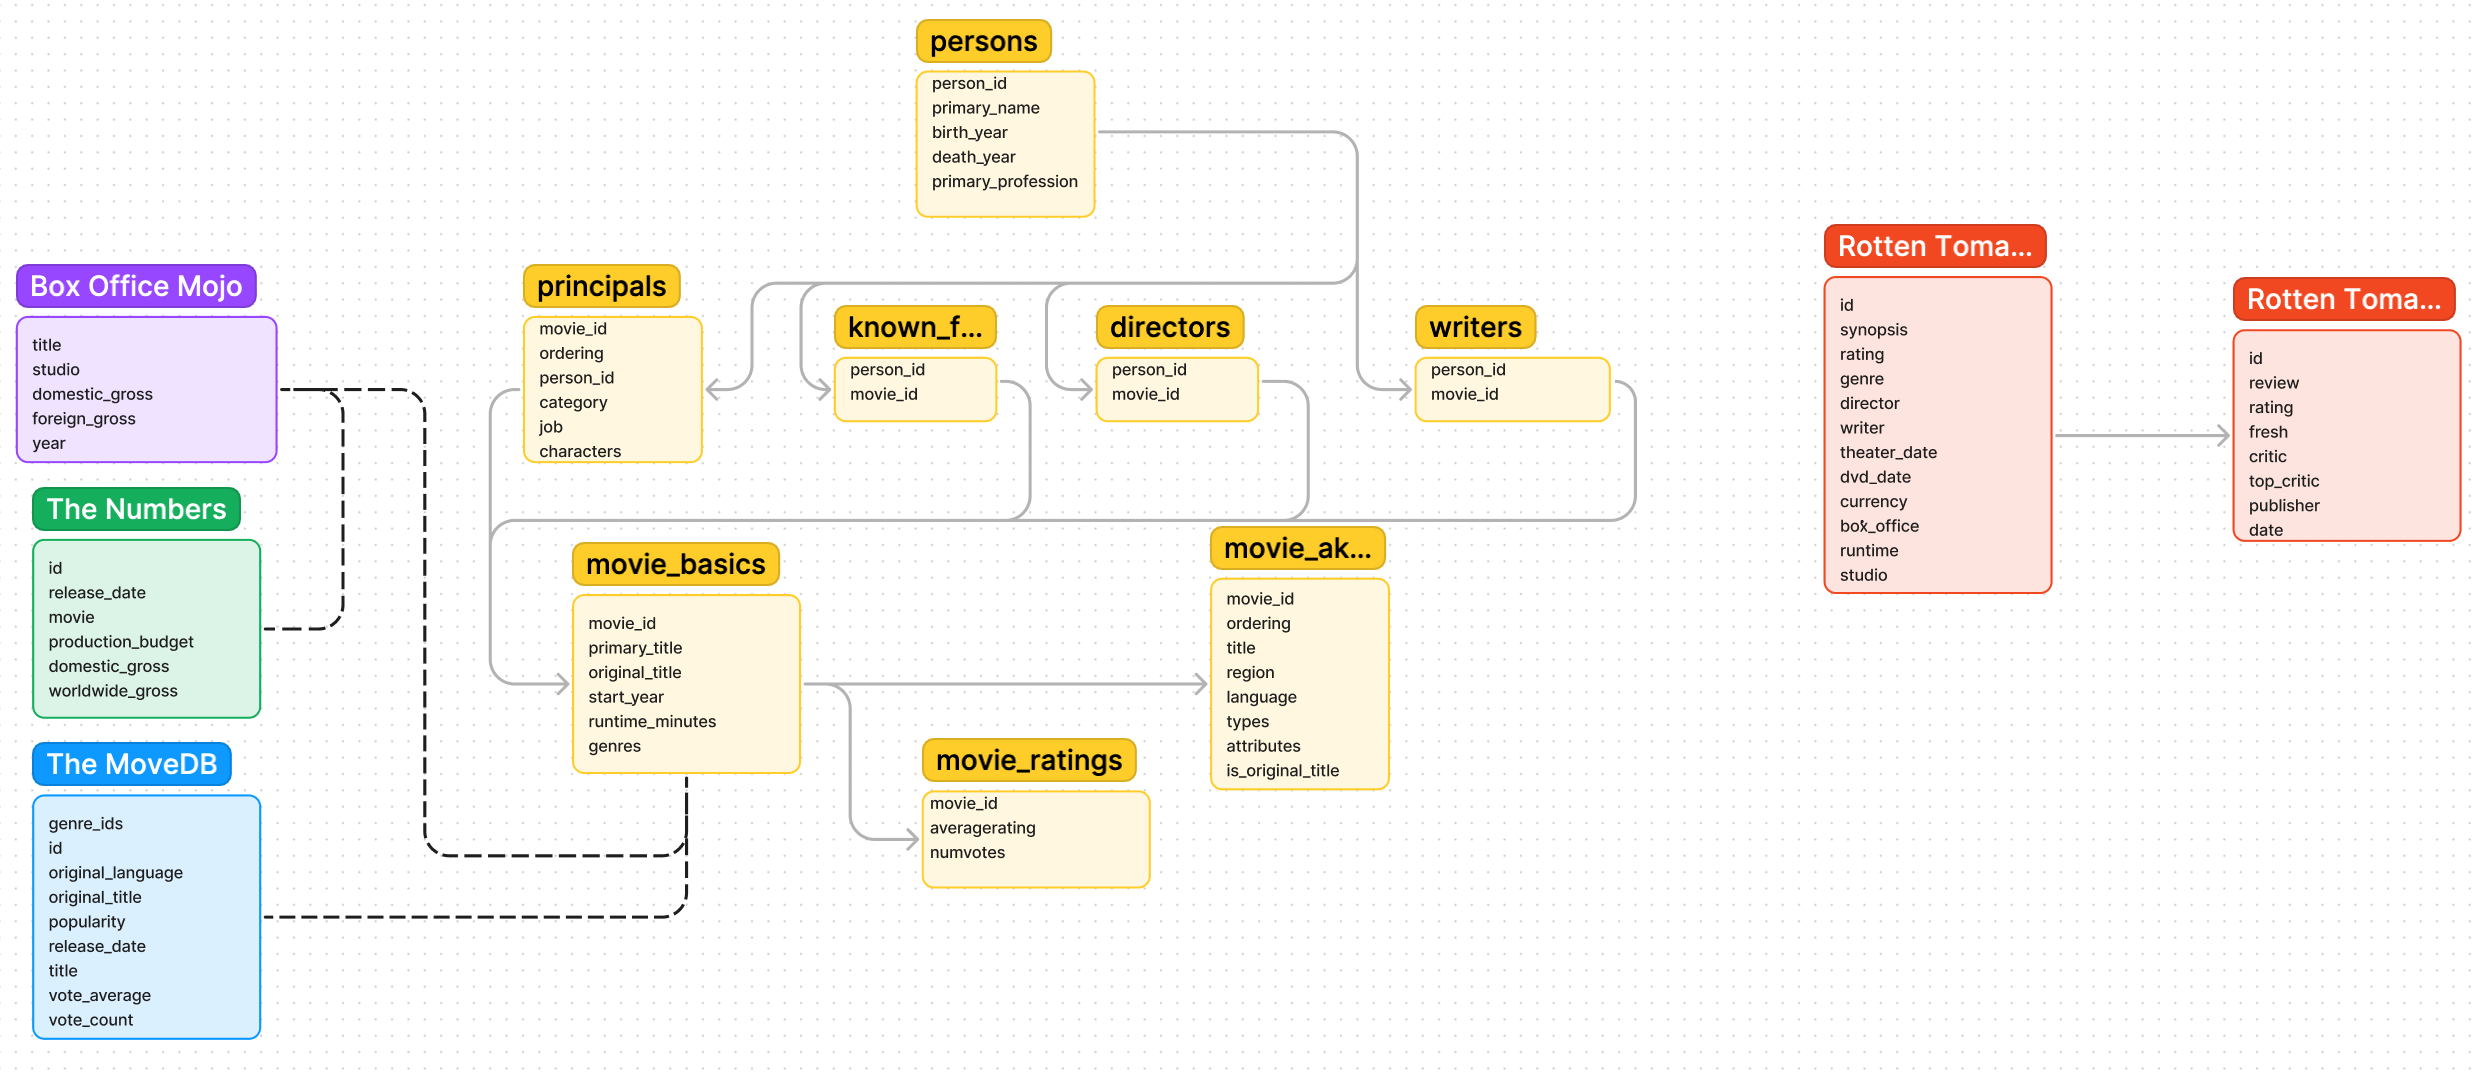

`im.db` database is the most valuable database which has all the info for the movies except for revenues.
<br>

- `persons`, `principals`, `known_for`, `directors`, `writers`, and `movie_akas` datasets will be ignored because they are not relevant to the **Business Questions** mentioned earlier.
<br>

- `movie_basics` will be the main dataset used for the principal information for the movies, i.e genre, title, etc.
<br>

- `movie_ratings` will be used for tallying up the reviews and correlating genre with review and financial performance.
<br>


`Box Office Mojo` and `The Numbers` datasets are next most valuable ones because they contain information on financial performance of the movies.

- `Box Office Mojo` and `The Numbers` data contains the same financial information. 
<br>

- Since `The Numbers` dataset has more records, the `Box Office Mojo` dataset will be ignored. `The Number` dataset will be used to calculate the profits for financial analysis.
<br>

- The genre, reviews, and financial performance data will be joined with the imdb dataset. The joined dataset will be the main financial analysis daataframe that this notebook will use. 
<br>

- The timeline available in `The Numbers` dataset will be one of the limiting factors for analysis.

`The MovieDB` datasets will serve as an additional resource to compare with `movie_ratings`. The dataset wwill be joined with the `im.db` database and the reviews will be averaged between the two.

The `Rotten Tomatoes` datasets will be ignored because they don't provide any additional value for analysing customer reviews. `im.db` provides movie-specific data with more records.

**Forewarning**

Although the data and analysis we are conducting will provide us impactful insights, there are still blindspots in the analysis and gaps in the data that should be kept in mind when making any final decisions.

- We are not conidering client's company's internal factors
<br>

- We are not considering outside influences that can impact the data trend. For instance, social movements, world crisis, inflation, recession, etc
<br>

- None of the financial numbers have been adjusted for inflation
<br>

- No individual analysis of how much money was spent in marketing and advertising and that plays a part in the success of the movie
<br>

- We are not considering the recent shift to streaming platforms and how much extra revenue this brings in. Also it is possible that some movies never made it to the box-office or weren't boox-office hits and made most of the profits through streaming services.
<br>

- We are not accounting for the demographic of the reviewers which can provide greater insight and show any bias in the data
<br>

- There is no demographic data being analysed to identify a specific target population for the client
<br>

- We are only looking at US-based movies and movie houses
<br>

- The latest financial data we are looking at is for 2018 which is still 4 years old and doesn't account for the latest trends.
<br>

- The data, analysis and recommendations will be based on historical figures. There is no analysis done on changing trends across multiple fields to predict future trends.

## Data Preparation

The following steps will be followed in preparing the data:

- Data cleaning
<br>

- Data Structuring
<br>

- Data Organizing

### IMDB Database

#### movie_basics

In [30]:
im_movbas_df.head() # preview of dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [31]:
im_movbas_df.info() #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [32]:
mov_bas = im_movbas_df.dropna() # dropping the rows with missing data

mov_bas.info() # check to make sure no missing values left over

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


Lets adjust the data type of `runtime_minutes` to integer to make our anlaysis simpler later on.

In [33]:
# changing float data type to int64
mov_bas['runtime_minutes'] = mov_bas['runtime_minutes'].astype('int64')

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/4033443299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas['runtime_minutes'] = mov_bas['runtime_minutes'].astype('int64')


In [34]:
mov_bas.info() #cross-checking dataframe info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   movie_id         112232 non-null  object
 1   primary_title    112232 non-null  object
 2   original_title   112232 non-null  object
 3   start_year       112232 non-null  int64 
 4   runtime_minutes  112232 non-null  int64 
 5   genres           112232 non-null  object
dtypes: int64(2), object(4)
memory usage: 6.0+ MB


Now we will check for any duplicate titles or movie ids.

In [35]:
mov_bas['movie_id'].duplicated().value_counts() # check movie_id column for duplicates

False    112232
Name: movie_id, dtype: int64

In [36]:
mov_bas['primary_title'].duplicated().value_counts()# check primary_title column for duplicates

False    105478
True       6754
Name: primary_title, dtype: int64

In [37]:
mov_bas[mov_bas['primary_title'].duplicated(keep=False)].sort_values('primary_title') #previewing data

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
106201,tt6214664,(aguirre),(aguirre),2016,98,"Biography,Comedy,Documentary"
103890,tt6085916,(aguirre),(aguirre),2016,97,"Biography,Documentary"
42007,tt2518788,1,1,2013,112,"Documentary,History,Sport"
20620,tt1859618,1,1,2019,100,Drama
100818,tt5891614,1,1,2016,22,Documentary
...,...,...,...,...,...,...
66994,tt3815132,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
66995,tt3815134,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
23712,tt1961689,Éden,Éden,2011,64,Documentary


Looks like some of these have the same primary title but are different movies. Lets check for records with identical values in all columns except for movie_id since we have previously checked that `movie_id` column has all unique values.

In [38]:
# storing the column names we want to check in a separate list
col_chk = mov_bas.columns[1:]

#print the column names to check whether these are the ones we want
print(col_chk)

# check for duplicates on the other 5 columns
mov_bas.duplicated(col_chk, keep=False).value_counts()


Index(['primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres'],
      dtype='object')


False    112123
True        109
dtype: int64

In [39]:
# look at duplicate records
mov_bas[mov_bas.duplicated(col_chk, keep=False)].sort_values('primary_title')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
145118,tt9773302,3. Elma,3. Elma,2014,65,Drama
144392,tt9660588,3. Elma,3. Elma,2014,65,Drama
144337,tt9653930,3. Elma,3. Elma,2014,65,Drama
114899,tt6804666,8:30,8:30,2017,70,Mystery
86522,tt5017134,8:30,8:30,2017,70,Mystery
...,...,...,...,...,...,...
66991,tt3815126,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
66992,tt3815128,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
66993,tt3815130,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"
66989,tt3815122,Ângelo de Sousa - Tudo o Que Sou Capaz,Ângelo de Sousa - Tudo o Que Sou Capaz,2010,60,"Biography,Documentary"


In [40]:
# dropping duplicate records but keeping the first occurance

mov_bas.drop_duplicates(col_chk, keep = 'first', inplace=True)


/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/691034658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mov_bas.drop_duplicates(col_chk, keep = 'first', inplace=True)


In [41]:
# check to see if any duplicates left
mov_bas.duplicated(col_chk, keep=False).value_counts() 

False    112173
dtype: int64

We saw that the `genres` column has different number of values for each movie. Lets split this into separate columns to make it easier for analyzinng genre impacts. 

We will keep the original genres column for comparison wwith data that will be joined.

Notice that there are no spaces between the multiple genres. They are only separated by `,`.

We will strip the data of any spaces `" "` and then split it using `,`. This will be stored in a separate dataframe and then copied over into `mov_bas` so as we don't corrupt our original dataframe.

In [42]:
# strip the white space from genres and split it usinng ','
genre_split = mov_bas['genres'].str.strip(" ").str.split(',', expand=True)

# preview the new dataframe to check if the code above worked
print(genre_split.info(), '\n')
genre_split.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 112173 entries, 0 to 146139
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       112173 non-null  object
 1   1       54108 non-null   object
 2   2       27372 non-null   object
dtypes: object(3)
memory usage: 3.4+ MB
None 



,0,1,2
0,Action,Crime,Drama
1,Biography,Drama,None
2,Drama,None,None
4,Comedy,Drama,Fantasy
5,Comedy,None,None


We have the same number of records as the `mov_bas` dataframe and 3 columns. This means that the total number of new columns we need to add to `mov_bas` is **three**

In [91]:
#create new columnns in mov_bas with the values from genre_split
mov_bas['genre1'] = genre_split[0]

mov_bas['genre2'] = genre_split[1]

mov_bas['genre3'] = genre_split[2]

#preview the updated dataframe
mov_bas.head()

,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3
movie_id,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",NaN,NaN,NaN
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",NaN,NaN,NaN
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,NaN,NaN,NaN
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",NaN,NaN,NaN
tt0111414,A Thin Life,A Thin Life,2018,75,Comedy,NaN,NaN,NaN


We are going to leave the `None` values in place and use these in our analysis later.

#### movie_ratings

In [92]:
im_movrat_df.head() # preview the data

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [93]:
im_movrat_df.info() # get dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


There are not any missing values in this dataframe. Nonetheless it does have less records than `movie_basics`. This will become the limiting factor in how many records we have for analysis. 

Lets go ahead and merge `mov_bas` and this record.

In [94]:
mov_rat = im_movrat_df.copy() # make a copy of the dataframe

In [47]:
# set index to movie_id for both tables

mov_bas = mov_bas.set_index('movie_id')

mov_rat = mov_rat.set_index('movie_id')

In [48]:
# join mov_bas and mov_rat using movie_id
mov_bas_rat = mov_bas.join(mov_rat, how = 'inner')

# preview results
print(mov_bas_rat.info(), '\n')
mov_bas_rat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 65718 entries, tt0063540 to tt9916160
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    65718 non-null  object 
 1   original_title   65718 non-null  object 
 2   start_year       65718 non-null  int64  
 3   runtime_minutes  65718 non-null  int64  
 4   genres           65718 non-null  object 
 5   genre1           65718 non-null  object 
 6   genre2           34877 non-null  object 
 7   genre3           17840 non-null  object 
 8   averagerating    65718 non-null  float64
 9   numvotes         65718 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 5.5+ MB
None 



,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes
movie_id,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",Action,Crime,Drama,7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",Biography,Drama,None,7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,Drama,None,None,6.9,4517
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",Comedy,Drama,Fantasy,6.5,119
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83,"Adventure,Animation,Comedy",Adventure,Animation,Comedy,8.1,263


We need to decide on the minimum number of votes to use as a benchmark for our analysis. 

It is widely known that not all viewers leave reviews. The most amount of reviews come from people who reaally enjoyed the product or weren't satisfied in some way. As the number of reviews increases, these two groups of viewers showcase the actual quality of a movie.

Nonetheless, when the num of votes is less, it is possible that the rating is skewed to either to high or too low. For this purpose, we will look at a box and whisket plot to understand the raange of the number of votes and then set a benchmark.

This benchmark will be used to filter out the results we don't want to include in our analysis.

We will not look at the outliers and decide what statistical value we wwant to use as the baseline. The outliers greater than will meet out criteria and the ones less than our baseline aren't important to us.

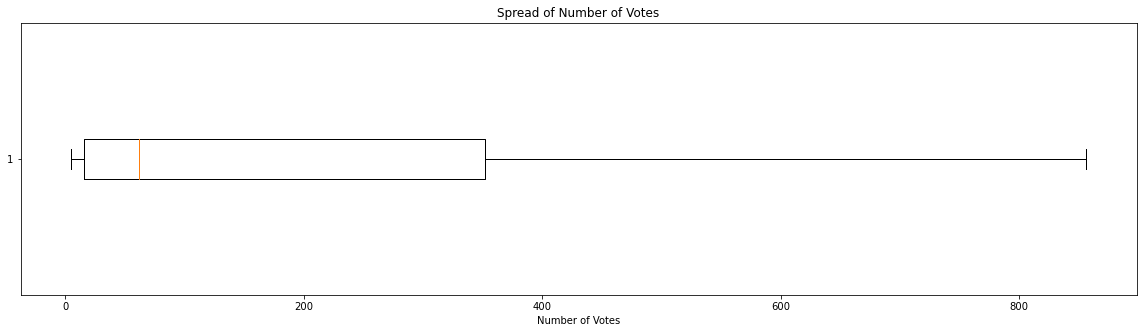

In [49]:
fig1, ax1 = plt.subplots() # setting the structure

fig1.set_size_inches(20, 5, forward=True) # adjusting the size of the figure

ax1.set_title('Spread of Number of Votes') # setting the title of the plot

ax1.set_xlabel('Number of Votes') # setting the x-axis label


ax1.boxplot(mov_bas_rat['numvotes'], vert = False, showfliers=False);


We can see that the box plot is **right-skewed** which means that most movies do not get a lot of reviews. Therefore we will choose **Q1** as the minimum number of votes for our analysis.

We will use numpy to calculate this.

In [50]:
baseline = np.quantile(mov_bas_rat['numvotes'], 0.25)

print(baseline, 'reviews is the minimum number of reviews we will be using to filter out data')

16.0 reviews is the minimum number of reviews we will be using to filter out data


### The MovieDB

In [51]:
# previewing the data and it's info
print(tmdb_df.info(), '\n')

tmdb_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None 



,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Looks like this dataset doesn't have any missing values. It does have a few redundant columns that are not relevant (that we talked about earlier) to our analysis. 

We will go ahead and drop them.

In [52]:
# make a copy of the dataframe
tmdb = tmdb_df.copy()

# drop irrelevant columns

#col_tmdb = tmdb.columns[[0:3] # Create a list of colunms to remove

tmdb = tmdb.drop(['Unnamed: 0', 'genre_ids', 'id', 'release_date', 'title'], axis=1) # drop columns

#preview the data and info
print(tmdb.info(), '\n')

tmdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   original_language  26517 non-null  object 
 1   original_title     26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   vote_average       26517 non-null  float64
 4   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.0+ MB
None 



,original_language,original_title,popularity,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,en,How to Train Your Dragon,28.734,7.7,7610
2,en,Iron Man 2,28.515,6.8,12368
3,en,Toy Story,28.005,7.9,10174
4,en,Inception,27.920,8.3,22186


Next we are going to filter our data for the original language because we want to focus on analyzig movies that were made for a US audience.

In [53]:
tmdb = tmdb[tmdb['original_language'].str.strip(' ') == 'en'] # filterting for english in original_language

In [54]:
tmdb.head() # previewing the results

,original_language,original_title,popularity,vote_average,vote_count
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,en,How to Train Your Dragon,28.734,7.7,7610
2,en,Iron Man 2,28.515,6.8,12368
3,en,Toy Story,28.005,7.9,10174
4,en,Inception,27.920,8.3,22186


Now we'll merge this data with the `mov_bas_rat` dataframe to perform comparitive analysis of the two sets of reviews. We will also look at the `popularity` data to gauge the movies' following.

First we have to rename the columns in `tmdb` to make it easier to distinguish between the reviews of `mov_rat` and this dataset.

In [55]:
# rename column
tmdb.rename(columns = {'vote_average' : 'tmdb_averagerating', 'vote_count' : 'tmdb_numvotes'}, inplace = True)

In [56]:
# preview the results
tmdb.head()

,original_language,original_title,popularity,tmdb_averagerating,tmdb_numvotes
0,en,Harry Potter and the Deathly Hallows: Part 1,33.533,7.7,10788
1,en,How to Train Your Dragon,28.734,7.7,7610
2,en,Iron Man 2,28.515,6.8,12368
3,en,Toy Story,28.005,7.9,10174
4,en,Inception,27.920,8.3,22186


Lets check the spread of the number of votes in this dataset to understand whether our previous `baseline` can be applied to this dataset too.

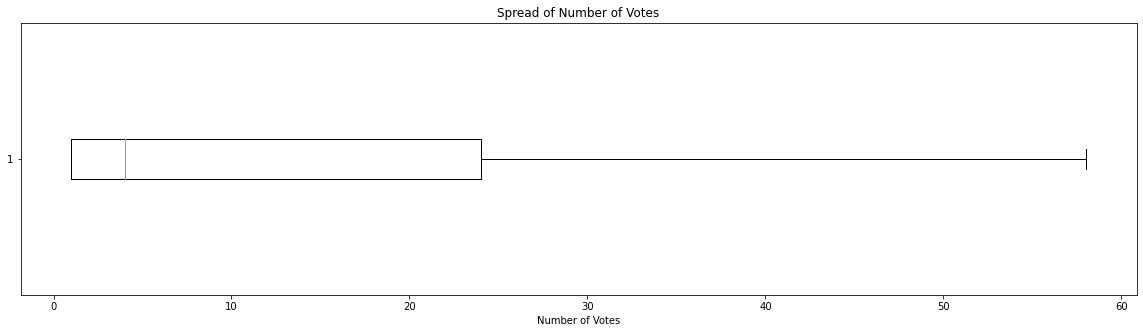

In [57]:
fig2, ax2 = plt.subplots() # setting the structure

fig2.set_size_inches(20, 5, forward=True) # adjusting the size of the figure

ax2.set_title('Spread of Number of Votes') # setting the title of the plot

ax2.set_xlabel('Number of Votes') # setting the x-axis label


ax2.boxplot(tmdb['tmdb_numvotes'], vert = False, showfliers=False);

In [58]:
np.quantile(tmdb['tmdb_numvotes'], 0.75)

24.0

In [59]:
# join tmdb with mov_bas_rat based on original_title
# use pandasql to merge the two and filter for the english language

q = """
SELECT * 
FROM mov_bas_rat
INNER JOIN tmdb
    USING (original_title)
"""

mov_brt = pysqldf(q)

# preview results
mov_brt

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,original_language,popularity,tmdb_averagerating,tmdb_numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,Drama,None,None,6.9,4517,en,9.800,7.0,64
1,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",Action,Animation,Comedy,1.9,8248,en,4.705,2.1,46
2,tt0255820,Return to Babylon,Return to Babylon,2013,75,"Biography,Comedy,Drama",Biography,Comedy,Drama,5.9,123,en,0.877,7.0,1
3,tt0285252,Life's a Beach,Life's a Beach,2012,100,Comedy,Comedy,None,None,3.9,219,en,1.206,3.2,3
4,tt0293069,Dark Blood,Dark Blood,2012,86,Thriller,Thriller,None,None,6.6,1053,en,1.721,6.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15809,tt9652782,Bait,Bait,2019,89,Drama,Drama,None,None,7.0,79,en,7.117,5.5,358
15810,tt9680064,Walter,Walter,2019,90,Comedy,Comedy,None,None,6.4,35,en,3.277,5.5,31
15811,tt9899880,Columbus,Columbus,2018,85,Comedy,Comedy,None,None,5.8,5,en,8.964,7.3,130
15812,tt9906218,Unstoppable,Unstoppable,2019,84,Documentary,Documentary,None,None,8.1,8,en,0.600,1.6,4


### The Numbers

In [60]:
#preview the info and data
print(tn_df.info(),'\n')

tn_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None 



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Looks like there are no missing values.

Nonetheless, there is still some cleaning to do.

We will only keep the years from the `release_date` column 

Rename the `movie` column to `title` for consistency between dataframes

We should also adjust the financial columns so that the `$` sign and `,` is removed. 

We will also change the data type of the financial columns to a numeric type.


In [61]:
#copy the dataframe
tn = tn_df.copy()

In [62]:
#keep only the years in release_date column
#use the datetime module to extract the years

tn['release_date'] = tn['release_date'].map(
    lambda x: dt.datetime.strptime(x.replace(',',''),'%b %d %Y').year).astype('int64')

In [63]:
#rename the movie column to title 
tn.rename(columns = {'movie':'title'},inplace = True)

In [64]:
#drop the id column
tn = tn.drop('id', axis=1)

In [65]:
#changing the datatype to integer
tn['production_budget'] = tn['production_budget'].astype(str).str.replace(',','').str.strip('$').astype('int64')
tn['domestic_gross'] = tn['domestic_gross'].astype(str).str.replace(',','').str.strip('$').astype('int64')
tn['worldwide_gross'] = tn['worldwide_gross'].astype(str).str.replace(',','').str.strip('$').astype('int64')

#preview results
print(tn.info(), '\n')
tn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   int64 
 1   title              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 226.0+ KB
None 



,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009,Avatar,425000000,760507625,2776345279
1,2011,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,2019,Dark Phoenix,350000000,42762350,149762350
3,2015,Avengers: Age of Ultron,330600000,459005868,1403013963
4,2017,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Since our client is considering making an impactful entry in the market, we will be evaluatinng movies that had atleast **$1 million** in domestic gross revenue.

In [66]:
#dropping records with less than 1 million domestic_gross

tn = tn[tn['domestic_gross'] >= 1000000]

#reducing significant figures
tn['production_budget'] = tn['production_budget'].div(1000000).astype('int64')
tn['domestic_gross'] = tn['domestic_gross'].div(1000000).astype('int64')
tn['worldwide_gross'] = tn['worldwide_gross'].div(1000000).astype('int64')

#rounding everything
tn['production_budget'] = tn['production_budget'].round(-1)
tn['domestic_gross'] = tn['domestic_gross'].round(-1)
tn['worldwide_gross'] = tn['worldwide_gross'].round(-1)

#rename the columns
tn.rename(columns = {'production_budget':'production_budget ($ millions)', 
                      'domestic_gross' : 'domestic_gross ($ millions)',
                        'worldwide_gross' : 'worldwide_gross ($ millions)'
                        }, inplace=True)

In [67]:
#preview of results
print(tn.info(), '\n')

tn.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4451 entries, 0 to 5773
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   release_date                    4451 non-null   int64 
 1   title                           4451 non-null   object
 2   production_budget ($ millions)  4451 non-null   int64 
 3   domestic_gross ($ millions)     4451 non-null   int64 
 4   worldwide_gross ($ millions)    4451 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 208.6+ KB
None 



,release_date,title,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions)
0,2009,Avatar,420,760,2780
1,2011,Pirates of the Caribbean: On Stranger Tides,410,240,1040
2,2019,Dark Phoenix,350,40,150
3,2015,Avengers: Age of Ultron,330,460,1400
4,2017,Star Wars Ep. VIII: The Last Jedi,320,620,1320


Now, we are going to join this dataset with `mov_brt` to complete our Dataframe for analysis.

In [367]:
#Join the two datasets using SQL

q1 = """
SELECT *
FROM mov_brt AS m
INNER JOIN tn AS t
    ON m.primary_title = t.title
"""

brt_tn = pysqldf(q1)
# print(len(brt_tn), len(brt_tn1), len(brt_tn2))


brt_tn

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,original_language,popularity,tmdb_averagerating,tmdb_numvotes,release_date,title,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions)
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,7.3,275300,en,10.743,7.1,4859,2013,The Secret Life of Walter Mitty,90,60,190
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"Action,Crime,Drama",Action,Crime,Drama,6.5,105116,en,19.373,6.3,1685,2014,A Walk Among the Tombstones,30,30,60
2,tt0369610,Jurassic World,Jurassic World,2015,124,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,539338,en,20.709,6.6,14056,2015,Jurassic World,220,650,1650
3,tt0376136,The Rum Diary,The Rum Diary,2011,119,"Comedy,Drama",Comedy,Drama,None,6.2,94787,en,12.011,5.7,652,2011,The Rum Diary,40,10,20
4,tt0383010,The Three Stooges,The Three Stooges,2012,92,"Comedy,Family",Comedy,Family,None,5.1,28570,en,9.358,5.1,215,2012,The Three Stooges,30,40,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,tt9447594,The Gambler,The Gambler,2019,121,"Action,Sci-Fi,Thriller",Action,Sci-Fi,Thriller,6.1,10,en,8.807,5.8,783,2014,The Gambler,20,30,40
1959,tt9652782,Bait,Bait,2019,89,Drama,Drama,None,None,7.0,79,en,7.117,5.5,358,2000,Bait,40,20,20
1960,tt9899880,Columbus,Columbus,2018,85,Comedy,Comedy,None,None,5.8,5,en,8.964,7.3,130,2017,Columbus,0,0,0
1961,tt9906218,Unstoppable,Unstoppable,2019,84,Documentary,Documentary,None,None,8.1,8,en,0.600,1.6,4,2010,Unstoppable,100,80,160


### Review

The client had 3 goals that we wanted to help achieve:

1. Profitability
2. Positive Viewer Response
3. Impactful Market Entry

To help achieve these goals, we decided to pose three three questions for our analysis to answer:

1. Which genres bring in the highest ratings and profits?
    - This allows us too produce insights for the profitability and positive viewer response
2. Should the movie be launched internationally?
    - This allows to gauge impactful market entry
3. What should the budget target be for the movie?
    - This allows us to understand the profit margins the client can expect
    
These questions will be asnwered using 2 main KPIs

1. Ratings
2. Profits


To answer these questions, we will perform analysis using the dataframes listed below:

1. Which genres bring in the highest ratings and profits?
    - genre vs ratings/popularity analysis: `mov_brt`
    - genre vs profits analysis: `brt_tn`
    - genre vs ratings/popularity vs profits analysis: `brt_tn`
2. Should the movie be launched internationally?
    - genres vs domestic profit analysis: `brt_tn`
    - genres vs wordwide profit analysis: `brt_tn`
3. What should the budget target be for the movie?
    - genres vs production budget analysis: `brt_tn`
    

## Data Interpretation and Visualizations

### Which genres bring in the highest ratings and profits?

#### genre vs ratings analysis: `mov_brt`

Lets preview the dataframe we will be using for this analysis.

In [69]:
mov_brt.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,original_language,popularity,tmdb_averagerating,tmdb_numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,Drama,None,None,6.9,4517,en,9.800,7.0,64
1,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",Action,Animation,Comedy,1.9,8248,en,4.705,2.1,46
2,tt0255820,Return to Babylon,Return to Babylon,2013,75,"Biography,Comedy,Drama",Biography,Comedy,Drama,5.9,123,en,0.877,7.0,1
3,tt0285252,Life's a Beach,Life's a Beach,2012,100,Comedy,Comedy,None,None,3.9,219,en,1.206,3.2,3
4,tt0293069,Dark Blood,Dark Blood,2012,86,Thriller,Thriller,None,None,6.6,1053,en,1.721,6.1,7


Lets first look at the range of years we have data available for:

In [70]:
years = mov_brt.sort_values('start_year')['start_year'].unique()

print(
'The earliest year we have data is for: ', min(years), '\n',
'The latest year we have data is for: ', max(years), '\n'
)

The earliest year we have data is for:  2010 
 The latest year we have data is for:  2019 



Now lets take a look at the spread of this data

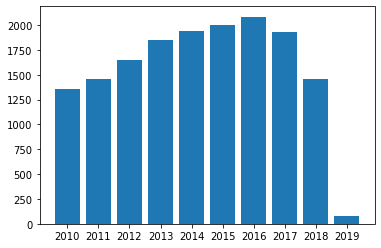

In [71]:
#fig, ax = plt.plot()

plt.bar(years, mov_brt.sort_values('start_year')['start_year'].value_counts(sort=False));
plt.xticks(np.arange(min(years), max(years)+1, 1.0));

We have very few records for `2019`. We will go ahead and ignore this data from our analysis to avoid skewing results.

In [72]:
brt_analysis = mov_brt[mov_brt['start_year'] != 2019]

brt_analysis.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,original_language,popularity,tmdb_averagerating,tmdb_numvotes
0,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,Drama,None,None,6.9,4517,en,9.800,7.0,64
1,tt0249516,Foodfight!,Foodfight!,2012,91,"Action,Animation,Comedy",Action,Animation,Comedy,1.9,8248,en,4.705,2.1,46
2,tt0255820,Return to Babylon,Return to Babylon,2013,75,"Biography,Comedy,Drama",Biography,Comedy,Drama,5.9,123,en,0.877,7.0,1
3,tt0285252,Life's a Beach,Life's a Beach,2012,100,Comedy,Comedy,None,None,3.9,219,en,1.206,3.2,3
4,tt0293069,Dark Blood,Dark Blood,2012,86,Thriller,Thriller,None,None,6.6,1053,en,1.721,6.1,7


Lets extract the columns we need to do a genre vs rating analysis

In [73]:
brt_analysis = brt_analysis.drop(['primary_title', 'original_title', 
                   'runtime_minutes', 'genres', 'original_language'], axis=1)


In [74]:
brt_analysis

,movie_id,start_year,genre1,genre2,genre3,averagerating,numvotes,popularity,tmdb_averagerating,tmdb_numvotes
0,tt0069049,2018,Drama,None,None,6.9,4517,9.800,7.0,64
1,tt0249516,2012,Action,Animation,Comedy,1.9,8248,4.705,2.1,46
2,tt0255820,2013,Biography,Comedy,Drama,5.9,123,0.877,7.0,1
3,tt0285252,2012,Comedy,None,None,3.9,219,1.206,3.2,3
4,tt0293069,2012,Thriller,None,None,6.6,1053,1.721,6.1,7
...,...,...,...,...,...,...,...,...,...,...
15803,tt9584192,2018,Documentary,None,None,5.6,64,0.697,10.0,1
15805,tt9598566,2018,Drama,None,None,7.3,30,0.600,10.0,1
15807,tt9646364,2018,Drama,None,None,7.8,6,5.255,5.2,55
15808,tt9647790,2018,Documentary,None,None,8.2,8,1.400,5.7,3


Lets merge the average rating from `averagerating` and `tmdb_averagerating`. We will also sum up the number of votes for the two datasets.

In [75]:
brt_analysis['avg_rating'] = (brt_analysis['averagerating'].multiply(brt_analysis['numvotes']) + 
brt_analysis['tmdb_averagerating'].multiply(brt_analysis['tmdb_numvotes'])).div(
    brt_analysis['numvotes'] + brt_analysis['tmdb_numvotes'])

brt_analysis['tot_votes'] = brt_analysis['numvotes'] + brt_analysis['tmdb_numvotes']

brt_analysis.drop(['averagerating','numvotes', 'tmdb_averagerating', 'tmdb_numvotes'], axis = 1, inplace=True)

brt_analysis

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
0,tt0069049,2018,Drama,None,None,9.800,6.901397,4581
1,tt0249516,2012,Action,Animation,Comedy,4.705,1.901109,8294
2,tt0255820,2013,Biography,Comedy,Drama,0.877,5.908871,124
3,tt0285252,2012,Comedy,None,None,1.206,3.890541,222
4,tt0293069,2012,Thriller,None,None,1.721,6.596698,1060
...,...,...,...,...,...,...,...,...
15803,tt9584192,2018,Documentary,None,None,0.697,5.667692,65
15805,tt9598566,2018,Drama,None,None,0.600,7.387097,31
15807,tt9646364,2018,Drama,None,None,5.255,5.455738,61
15808,tt9647790,2018,Documentary,None,None,1.400,7.518182,11


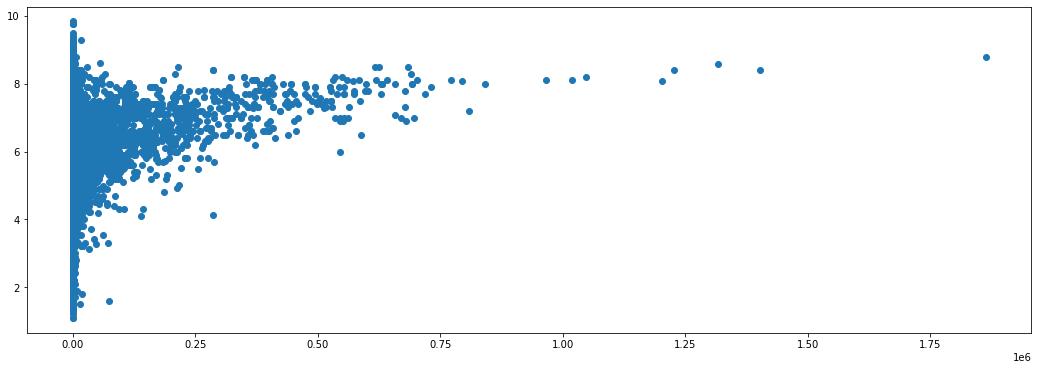

In [76]:
fig, ax = plt.subplots(figsize=(18,6))

ax.scatter(x = brt_analysis['tot_votes'], y = brt_analysis['avg_rating']);



It is cleara from the plot above that low number of reviews can be skewed but as the number for reviews increase, we generally see a trend towards a higher rating. 

Lets zoom in on nummof votes less that 250k

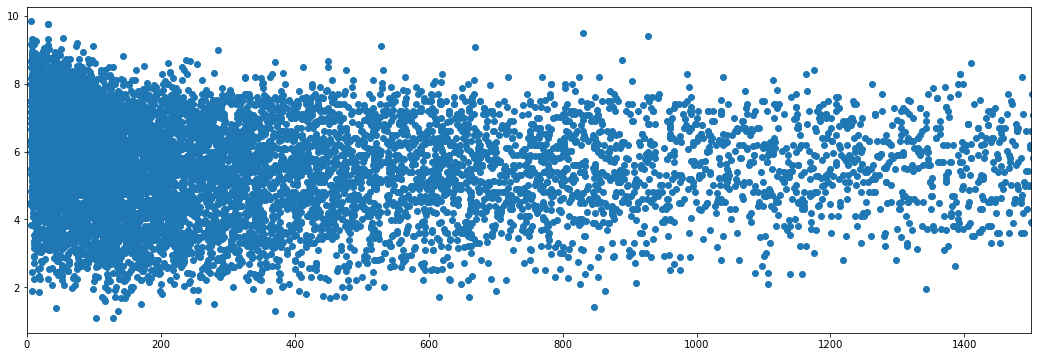

In [77]:
fig2, ax2 = plt.subplots(figsize=(18,6))
ax2.scatter(x = brt_analysis['tot_votes'], y = brt_analysis['avg_rating']);
plt.xlim(0,1500);

In [78]:
 brt_analysis = brt_analysis[brt_analysis['tot_votes'] >= brt_analysis['tot_votes'].median()]

In [96]:
brt_analysis.fillna('NA', inplace=True)
brt_analysis.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/2440504421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brt_analysis.fillna('NA', inplace=True)


,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
0,tt0069049,2018,Drama,NA,NA,9.800,6.901397,4581
1,tt0249516,2012,Action,Animation,Comedy,4.705,1.901109,8294
4,tt0293069,2012,Thriller,NA,NA,1.721,6.596698,1060
6,tt0323808,2011,Drama,Horror,NA,2.962,3.905312,2353
7,tt0326965,2010,Drama,Mystery,Thriller,1.795,5.498952,1909


average movie rating on imdb is 7

In [80]:
brt_analysis

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
0,tt0069049,2018,Drama,NA,NA,9.800,6.901397,4581
1,tt0249516,2012,Action,Animation,Comedy,4.705,1.901109,8294
4,tt0293069,2012,Thriller,NA,NA,1.721,6.596698,1060
6,tt0323808,2011,Drama,Horror,NA,2.962,3.905312,2353
7,tt0326965,2010,Drama,Mystery,Thriller,1.795,5.498952,1909
...,...,...,...,...,...,...,...,...
15769,tt9206798,2018,Biography,Drama,History,6.777,5.903975,805
15780,tt9316022,2018,Documentary,NA,NA,3.591,8.102944,2038
15788,tt9363208,2018,Thriller,NA,NA,10.101,6.493529,1020
15793,tt9392532,2018,Comedy,Drama,NA,14.979,6.205534,4554


In [81]:
brt_rat = brt_analysis[brt_analysis['avg_rating'] >= 7]

In [82]:
brt_rat

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
10,tt0359950,2013,Adventure,Comedy,Drama,10.743,7.296531,280159
23,tt0398286,2010,Adventure,Animation,Comedy,21.511,7.794844,372773
36,tt0433035,2011,Action,Drama,Family,14.811,7.095245,288100
39,tt0435761,2010,Adventure,Animation,Comedy,24.445,8.292754,690558
40,tt0443272,2012,Biography,Drama,History,12.693,7.394126,230962
...,...,...,...,...,...,...,...,...
15724,tt8948614,2018,Documentary,NA,NA,3.424,7.401991,703
15726,tt8951058,2018,Documentary,NA,NA,2.443,7.192929,495
15746,tt9095324,2018,Documentary,Music,NA,5.791,8.097764,1968
15780,tt9316022,2018,Documentary,NA,NA,3.591,8.102944,2038


In [356]:
q = """
SELECT *, COUNT(movie_id) as count_of_movies
FROM brt_rat
GROUP BY genre1, genre2, genre3
"""

brt_ratc = pysqldf(q)
brt_ratc

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes,count_of_movies
0,tt0481499,2013,Action,Adventure,Animation,16.290,7.191421,180572,15
1,tt1663202,2015,Action,Adventure,Biography,19.410,7.989500,632257,4
2,tt0478970,2015,Action,Adventure,Comedy,32.715,7.295343,513162,14
3,tt1515091,2011,Action,Adventure,Crime,18.301,7.493629,400569,1
4,tt2545428,2015,Action,Adventure,Documentary,8.237,7.699080,12720,2
...,...,...,...,...,...,...,...,...,...
219,tt1219289,2011,Mystery,Sci-Fi,Thriller,19.453,7.396214,498785,1
220,tt1130884,2010,Mystery,Thriller,NA,18.060,8.100000,1018585,1
221,tt1385826,2011,Romance,Sci-Fi,Thriller,13.717,7.094321,230231,1
222,tt4028068,2014,Sci-Fi,NA,NA,31.618,7.295074,12586,1


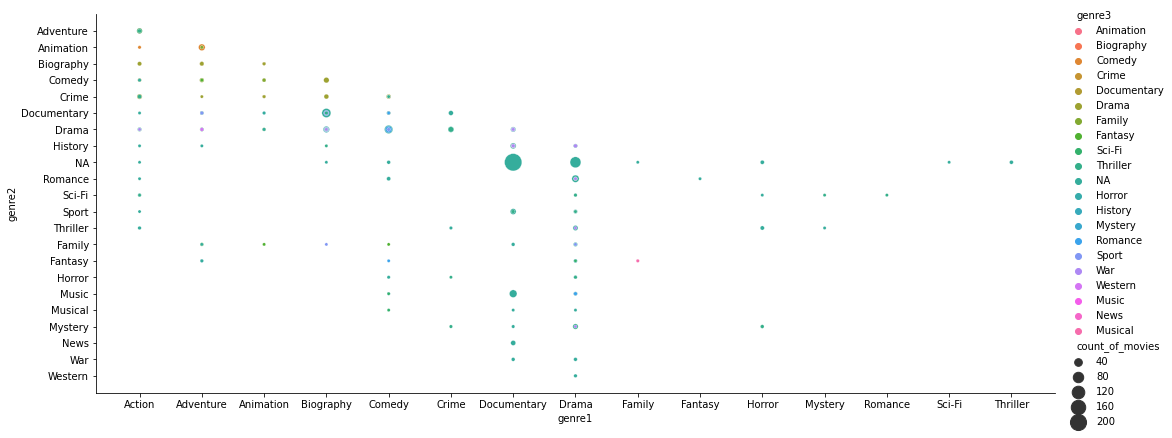

In [357]:
cmap = sns.color_palette("Paired",n_colors=19)
g = sns.relplot(
    data=brt_ratc,
    x="genre1", y="genre2",
    hue="genre3", size="count_of_movies",
    
     sizes=(10, 300),
    height = 6,
    aspect = 2.5
)


In [358]:
brt_avr = brt_rat[brt_analysis['avg_rating'] <= 8]
brt_avr

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/2774156413.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  brt_avr = brt_rat[brt_analysis['avg_rating'] <= 8]


,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
10,tt0359950,2013,Adventure,Comedy,Drama,10.743,7.296531,280159
23,tt0398286,2010,Adventure,Animation,Comedy,21.511,7.794844,372773
36,tt0433035,2011,Action,Drama,Family,14.811,7.095245,288100
40,tt0443272,2012,Biography,Drama,History,12.693,7.394126,230962
42,tt0446029,2010,Action,Comedy,Fantasy,14.383,7.497738,343220
...,...,...,...,...,...,...,...,...
15607,tt8362964,2018,Horror,Thriller,NA,1.917,7.095767,1441
15615,tt8413566,2018,Comedy,Romance,NA,10.319,7.121552,696
15724,tt8948614,2018,Documentary,NA,NA,3.424,7.401991,703
15726,tt8951058,2018,Documentary,NA,NA,2.443,7.192929,495


In [359]:
brt_gd = brt_rat[brt_rat['avg_rating'] > 8]
brt_gd = brt_gd[brt_gd['avg_rating'] <=9]
brt_gd

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
39,tt0435761,2010,Adventure,Animation,Comedy,24.445,8.292754,690558
119,tt0770802,2011,Documentary,Music,NA,6.015,8.497240,30001
161,tt0816692,2014,Adventure,Drama,Sci-Fi,28.440,8.594356,1317931
184,tt0848228,2012,Action,Adventure,Sci-Fi,50.289,8.091826,1203328
212,tt0892769,2010,Action,Adventure,Animation,28.734,8.095082,618909
...,...,...,...,...,...,...,...,...
15471,tt7905466,2018,Documentary,History,War,10.441,8.397655,15735
15535,tt8106568,2018,Documentary,NA,NA,1.801,8.184043,564
15550,tt8135494,2018,Documentary,NA,NA,4.566,8.200503,6958
15746,tt9095324,2018,Documentary,Music,NA,5.791,8.097764,1968


In [360]:
brt_exc = brt_rat[brt_rat['avg_rating'] > 9]
brt_exc

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
5436,tt2170667,2014,Drama,NA,NA,1.310,9.299480,17314
13580,tt5624252,2016,Documentary,NA,NA,0.600,9.399569,928
14051,tt5957600,2017,Documentary,NA,NA,0.641,9.097921,529
14915,tt6842524,2017,Documentary,NA,NA,0.600,9.500602,830
15261,tt7433762,2017,Comedy,NA,NA,0.756,9.081614,669


In [361]:
q = """
SELECT genre1, genre2, genre3, COUNT(avg_rating) AS count
FROM brt_avr
GROUP BY genre1, genre2, genre3
"""

df = pysqldf(q)

q0 = """
SELECT genre1, genre2, genre3, COUNT(avg_rating) AS count
FROM brt_gd
GROUP BY genre1, genre2, genre3
"""

df0 = pysqldf(q0)

q2 = """
SELECT genre1, genre2, genre3, COUNT(avg_rating) AS count
FROM brt_exc
GROUP BY genre1, genre2, genre3
"""
df2 = pysqldf(q2)

df0

,genre1,genre2,genre3,count
0,Action,Adventure,Animation,2
1,Action,Adventure,Comedy,1
2,Action,Adventure,Sci-Fi,4
3,Action,Biography,Drama,1
4,Action,Crime,Thriller,1
5,Action,Drama,Sci-Fi,2
6,Action,Thriller,NA,1
7,Adventure,Animation,Comedy,5
8,Adventure,Animation,Drama,1
9,Adventure,Biography,Documentary,1


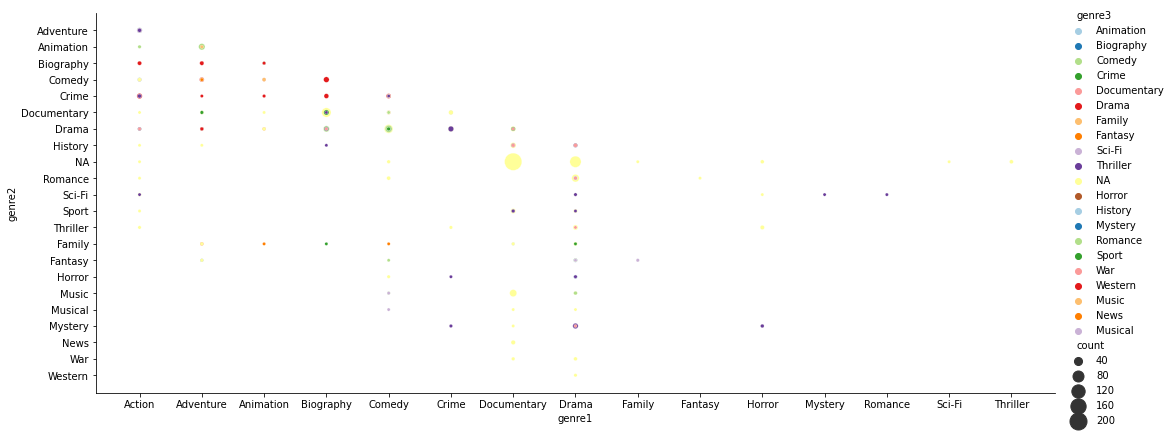

In [362]:
cmap = sns.color_palette("Paired",n_colors=21)
g = sns.relplot(
    data=df,
    x="genre1", y="genre2",
    hue="genre3", size="count",
    palette = cmap,
     sizes=(10, 300),
    height = 6,
    aspect = 2.5
)


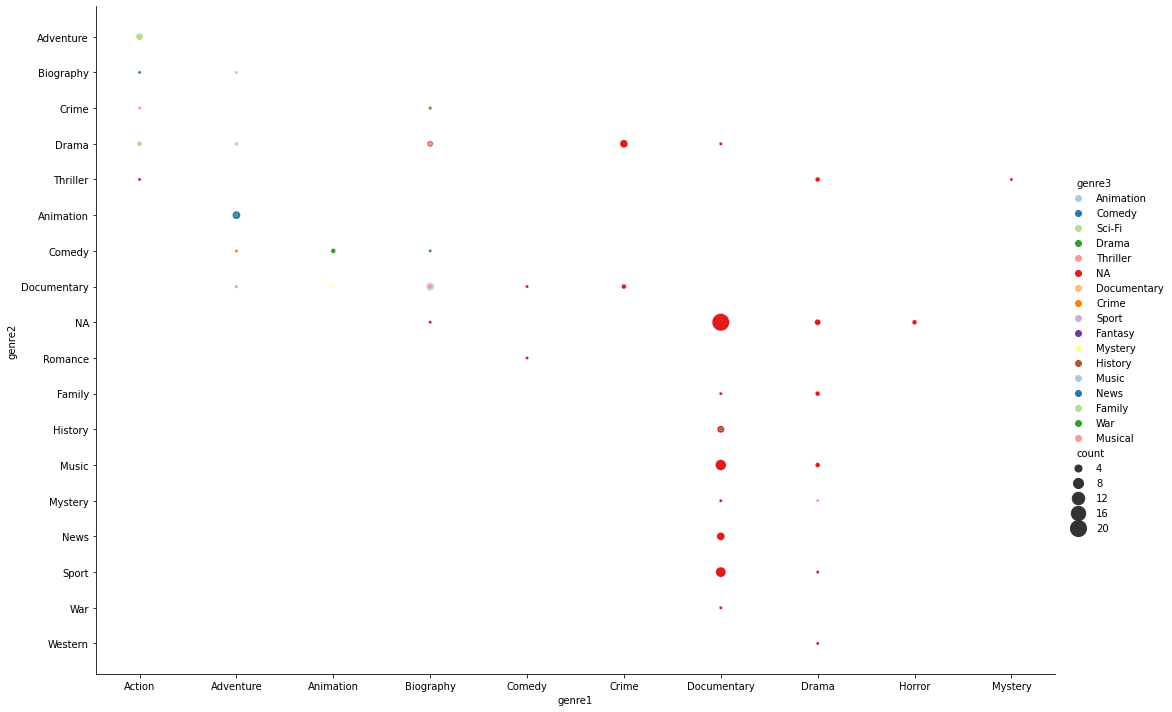

In [363]:
cmap = sns.color_palette("Paired",n_colors=17)
g = sns.relplot(
    data=df0,
    x="genre1", y="genre2",
    hue="genre3", size="count",
    palette = cmap,
     sizes=(10, 300),
    height = 10,
    aspect = 1.5
)

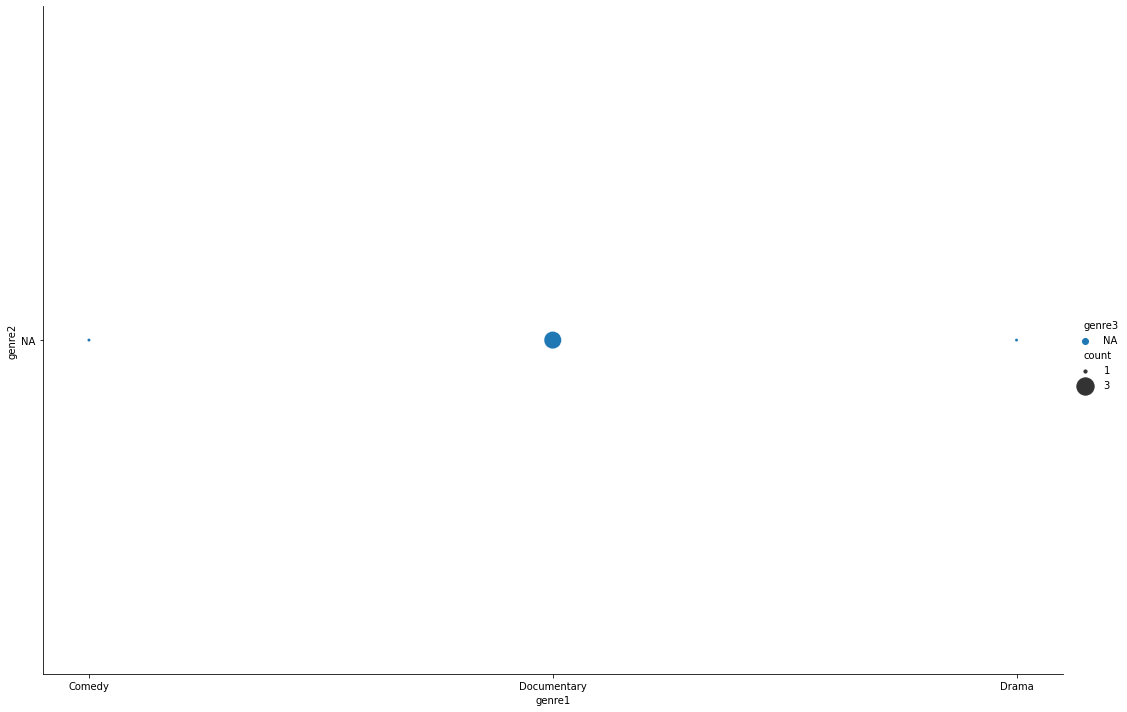

In [99]:
cmap = sns.color_palette("Paired",n_colors=17)
g = sns.relplot(
    data=df2,
    x="genre1", y="genre2",
    hue="genre3", size="count",
    
     sizes=(10, 300),
    height = 10,
    aspect = 1.5
)

### genre vs profits analysis

In [364]:
brt_analysis

,movie_id,start_year,genre1,genre2,genre3,popularity,avg_rating,tot_votes
0,tt0069049,2018,Drama,NA,NA,9.800,6.901397,4581
1,tt0249516,2012,Action,Animation,Comedy,4.705,1.901109,8294
4,tt0293069,2012,Thriller,NA,NA,1.721,6.596698,1060
6,tt0323808,2011,Drama,Horror,NA,2.962,3.905312,2353
7,tt0326965,2010,Drama,Mystery,Thriller,1.795,5.498952,1909
...,...,...,...,...,...,...,...,...
15769,tt9206798,2018,Biography,Drama,History,6.777,5.903975,805
15780,tt9316022,2018,Documentary,NA,NA,3.591,8.102944,2038
15788,tt9363208,2018,Thriller,NA,NA,10.101,6.493529,1020
15793,tt9392532,2018,Comedy,Drama,NA,14.979,6.205534,4554


In [368]:
brt_tn.sort_values('start_year')['start_year'].value_counts()

2016    297
2015    256
2013    219
2014    212
2011    210
2010    202
2017    199
2012    194
2018    162
2019     12
Name: start_year, dtype: int64

In [369]:
brttn = brt_tn[brt_tn['start_year'] != 2019]
brttn.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,genre1,genre2,genre3,averagerating,numvotes,original_language,popularity,tmdb_averagerating,tmdb_numvotes,release_date,title,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions)
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,7.3,275300,en,10.743,7.1,4859,2013,The Secret Life of Walter Mitty,90,60,190
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114,"Action,Crime,Drama",Action,Crime,Drama,6.5,105116,en,19.373,6.3,1685,2014,A Walk Among the Tombstones,30,30,60
2,tt0369610,Jurassic World,Jurassic World,2015,124,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,539338,en,20.709,6.6,14056,2015,Jurassic World,220,650,1650
3,tt0376136,The Rum Diary,The Rum Diary,2011,119,"Comedy,Drama",Comedy,Drama,None,6.2,94787,en,12.011,5.7,652,2011,The Rum Diary,40,10,20
4,tt0383010,The Three Stooges,The Three Stooges,2012,92,"Comedy,Family",Comedy,Family,None,5.1,28570,en,9.358,5.1,215,2012,The Three Stooges,30,40,50


In [371]:
brttn = brttn[['movie_id',
              'genres',
              'genre1',
              'genre2',
              'genre3',
              'averagerating',
              'numvotes',
              'tmdb_averagerating',
              'tmdb_numvotes',
              'production_budget ($ millions)',
              'domestic_gross ($ millions)',
              'worldwide_gross ($ millions)']]

brttn

,movie_id,genres,genre1,genre2,genre3,averagerating,numvotes,tmdb_averagerating,tmdb_numvotes,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions)
0,tt0359950,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,7.3,275300,7.1,4859,90,60,190
1,tt0365907,"Action,Crime,Drama",Action,Crime,Drama,6.5,105116,6.3,1685,30,30,60
2,tt0369610,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,7.0,539338,6.6,14056,220,650,1650
3,tt0376136,"Comedy,Drama",Comedy,Drama,None,6.2,94787,5.7,652,40,10,20
4,tt0383010,"Comedy,Family",Comedy,Family,None,5.1,28570,5.1,215,30,40,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1952,tt8851190,Drama,Drama,None,None,8.1,26,5.0,1,60,90,200
1953,tt8917752,Drama,Drama,None,None,6.5,430,6.5,2723,60,60,100
1956,tt9266874,Documentary,Documentary,None,None,7.4,8,5.4,18,10,20,20
1957,tt9392532,"Comedy,Drama",Comedy,Drama,None,7.6,18,6.2,4536,20,150,270


In [372]:
brttn['avg_rating'] = (brttn['averagerating'].multiply(brttn['numvotes']) + 
brttn['tmdb_averagerating'].multiply(brttn['tmdb_numvotes'])).div(
    brttn['numvotes'] + brttn['tmdb_numvotes'])

brttn['tot_votes'] = brttn['numvotes'] + brttn['tmdb_numvotes']

brttn.drop(['averagerating','numvotes', 'tmdb_averagerating', 'tmdb_numvotes'], axis = 1, inplace=True)

brttn

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/381788985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn['avg_rating'] = (brttn['averagerating'].multiply(brttn['numvotes']) +
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/381788985.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn['tot_votes'] = brttn['numvotes'] + brttn['tmdb_numvotes']
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/381788985.py:7: SettingWithCopyWarning: 
A value is t

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions),avg_rating,tot_votes
0,tt0359950,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,90,60,190,7.296531,280159
1,tt0365907,"Action,Crime,Drama",Action,Crime,Drama,30,30,60,6.496845,106801
2,tt0369610,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,220,650,1650,6.989840,553394
3,tt0376136,"Comedy,Drama",Comedy,Drama,None,40,10,20,6.196584,95439
4,tt0383010,"Comedy,Family",Comedy,Family,None,30,40,50,5.100000,28785
...,...,...,...,...,...,...,...,...,...,...
1952,tt8851190,Drama,Drama,None,None,60,90,200,7.985185,27
1953,tt8917752,Drama,Drama,None,None,60,60,100,6.500000,3153
1956,tt9266874,Documentary,Documentary,None,None,10,20,20,6.015385,26
1957,tt9392532,"Comedy,Drama",Comedy,Drama,None,20,150,270,6.205534,4554


In [373]:
brttn['netprofit ($ millions)'] = brttn['worldwide_gross ($ millions)'] - brttn['production_budget ($ millions)']

brttn['domesticprofit ($ millions)'] = brttn['domestic_gross ($ millions)'] - brttn['production_budget ($ millions)']

brttn['foreignprofit ($ millions)'] = brttn['netprofit ($ millions)'] - brttn['domesticprofit ($ millions)']

brttn.head()

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/2531186499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn['netprofit ($ millions)'] = brttn['worldwide_gross ($ millions)'] - brttn['production_budget ($ millions)']
/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/2531186499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn['domesticprofit ($ millions)'] = brttn['domestic_gross ($ millions)'] - brttn['production_budget ($ millions)']
/var/folders/qv/0z2v23tn

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),domestic_gross ($ millions),worldwide_gross ($ millions),avg_rating,tot_votes,netprofit ($ millions),domesticprofit ($ millions),foreignprofit ($ millions)
0,tt0359950,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,90,60,190,7.296531,280159,100,-30,130
1,tt0365907,"Action,Crime,Drama",Action,Crime,Drama,30,30,60,6.496845,106801,30,0,30
2,tt0369610,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,220,650,1650,6.989840,553394,1430,430,1000
3,tt0376136,"Comedy,Drama",Comedy,Drama,None,40,10,20,6.196584,95439,-20,-30,10
4,tt0383010,"Comedy,Family",Comedy,Family,None,30,40,50,5.100000,28785,20,10,10


In [374]:
brttn.drop(['worldwide_gross ($ millions)', 'domestic_gross ($ millions)'], axis = 1, inplace=True)

/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/1732413559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn.drop(['worldwide_gross ($ millions)', 'domestic_gross ($ millions)'], axis = 1, inplace=True)


In [375]:
brttn.head()

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),avg_rating,tot_votes,netprofit ($ millions),domesticprofit ($ millions),foreignprofit ($ millions)
0,tt0359950,"Adventure,Comedy,Drama",Adventure,Comedy,Drama,90,7.296531,280159,100,-30,130
1,tt0365907,"Action,Crime,Drama",Action,Crime,Drama,30,6.496845,106801,30,0,30
2,tt0369610,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi,220,6.989840,553394,1430,430,1000
3,tt0376136,"Comedy,Drama",Comedy,Drama,None,40,6.196584,95439,-20,-30,10
4,tt0383010,"Comedy,Family",Comedy,Family,None,30,5.100000,28785,20,10,10


In [376]:
brttn = brttn[brttn['avg_rating'] >= 7]

In [377]:
brttn.fillna('NA',inplace=True)
brttn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560 entries, 0 to 1960
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   movie_id                        560 non-null    object 
 1   genres                          560 non-null    object 
 2   genre1                          560 non-null    object 
 3   genre2                          560 non-null    object 
 4   genre3                          560 non-null    object 
 5   production_budget ($ millions)  560 non-null    int64  
 6   avg_rating                      560 non-null    float64
 7   tot_votes                       560 non-null    int64  
 8   netprofit ($ millions)          560 non-null    int64  
 9   domesticprofit ($ millions)     560 non-null    int64  
 10  foreignprofit ($ millions)      560 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 52.5+ KB


/var/folders/qv/0z2v23tn1f1b2fnpqqgqsxch0000gn/T/ipykernel_84645/1033320916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brttn.fillna('NA',inplace=True)


In [378]:
a = """
SELECT *, 
    AVG("netprofit ($ millions)") AS avg_netprofits, 
    AVG("domesticprofit ($ millions)") AS avg_domprofits,
    AVG("foreignprofit ($ millions)") AS avg_foreignprofits
FROM brttn
GROUP BY genre1, genre2, genre3
ORDER BY avg_netprofits DESC
"""

brttn_g = pysqldf(a)

brttn_g

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),avg_rating,tot_votes,netprofit ($ millions),domesticprofit ($ millions),foreignprofit ($ millions),avg_netprofits,avg_domprofits,avg_foreignprofits
0,tt1074638,"Action,Adventure,Thriller",Action,Adventure,Thriller,200,7.787873,602662,910,100,810,910.0,100.0,810.0
1,tt2771200,"Family,Fantasy,Musical",Family,Fantasy,Musical,20,7.211739,244055,590,360,230,845.0,350.0,495.0
2,tt1727824,"Biography,Drama,Music",Biography,Drama,Music,60,8.002161,353095,830,160,670,830.0,160.0,670.0
3,tt1345836,"Action,Thriller",Action,Thriller,NA,280,8.393042,1401702,800,170,630,800.0,170.0,630.0
4,tt1170358,"Adventure,Fantasy",Adventure,Fantasy,NA,250,7.797300,573302,710,10,700,700.0,10.0,690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,tt2950418,"Biography,Family,Sport",Biography,Family,Sport,10,7.201065,3475,-10,-10,0,-10.0,-10.0,0.0
123,tt6206564,"Action,Drama,Thriller",Action,Drama,Thriller,30,7.599896,7691,-20,-20,0,-20.0,-20.0,0.0
124,tt7130472,"Action,Sport",Action,Sport,NA,30,7.014177,790,-20,-30,10,-20.0,-30.0,10.0
125,tt3779570,Sport,Sport,NA,NA,20,7.836250,80,-20,-20,0,-20.0,-20.0,0.0


In [379]:
n_profits = brttn_g.head(10)
n_profits

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),avg_rating,tot_votes,netprofit ($ millions),domesticprofit ($ millions),foreignprofit ($ millions),avg_netprofits,avg_domprofits,avg_foreignprofits
0,tt1074638,"Action,Adventure,Thriller",Action,Adventure,Thriller,200,7.787873,602662,910,100,810,910.0,100.0,810.0
1,tt2771200,"Family,Fantasy,Musical",Family,Fantasy,Musical,20,7.211739,244055,590,360,230,845.0,350.0,495.0
2,tt1727824,"Biography,Drama,Music",Biography,Drama,Music,60,8.002161,353095,830,160,670,830.0,160.0,670.0
3,tt1345836,"Action,Thriller",Action,Thriller,NA,280,8.393042,1401702,800,170,630,800.0,170.0,630.0
4,tt1170358,"Adventure,Fantasy",Adventure,Fantasy,NA,250,7.797300,573302,710,10,700,700.0,10.0,690.0
5,tt0451279,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,150,7.499888,487561,670,260,410,674.0,168.0,506.0
6,tt0903624,"Adventure,Family,Fantasy",Adventure,Family,Fantasy,250,7.888447,731705,770,50,720,670.0,50.0,620.0
7,tt4283448,"Documentary,Drama,Sport",Documentary,Drama,Sport,150,7.299587,12579,670,260,410,670.0,260.0,410.0
8,tt2071483,Family,Family,NA,NA,180,7.999174,12706,670,180,490,670.0,180.0,490.0
9,tt4028068,Sci-Fi,Sci-Fi,NA,NA,150,7.295074,12586,670,260,410,670.0,260.0,410.0


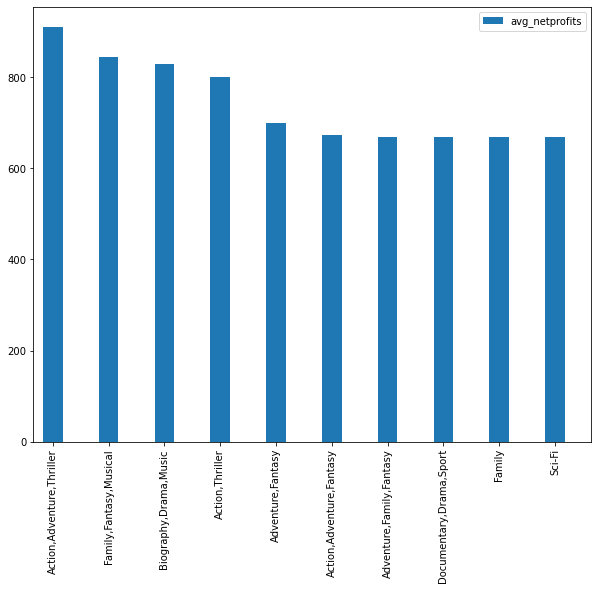

In [380]:
n_profits[['genres','avg_netprofits']].plot(kind='bar', width = 0.35, figsize = (10,8))
#n_profits['avg_rating'].plot( secondary_y=True)


ax = plt.gca()
plt.xlim([-0.35, len(n_c_profits['avg_netprofits'])-0.35])
ax.set_xticklabels(n_profits['genres'])

#plt.rcParams['figure.figsize'] = (10,6)

plt.show()

### genre vs ratings vs profits analysis

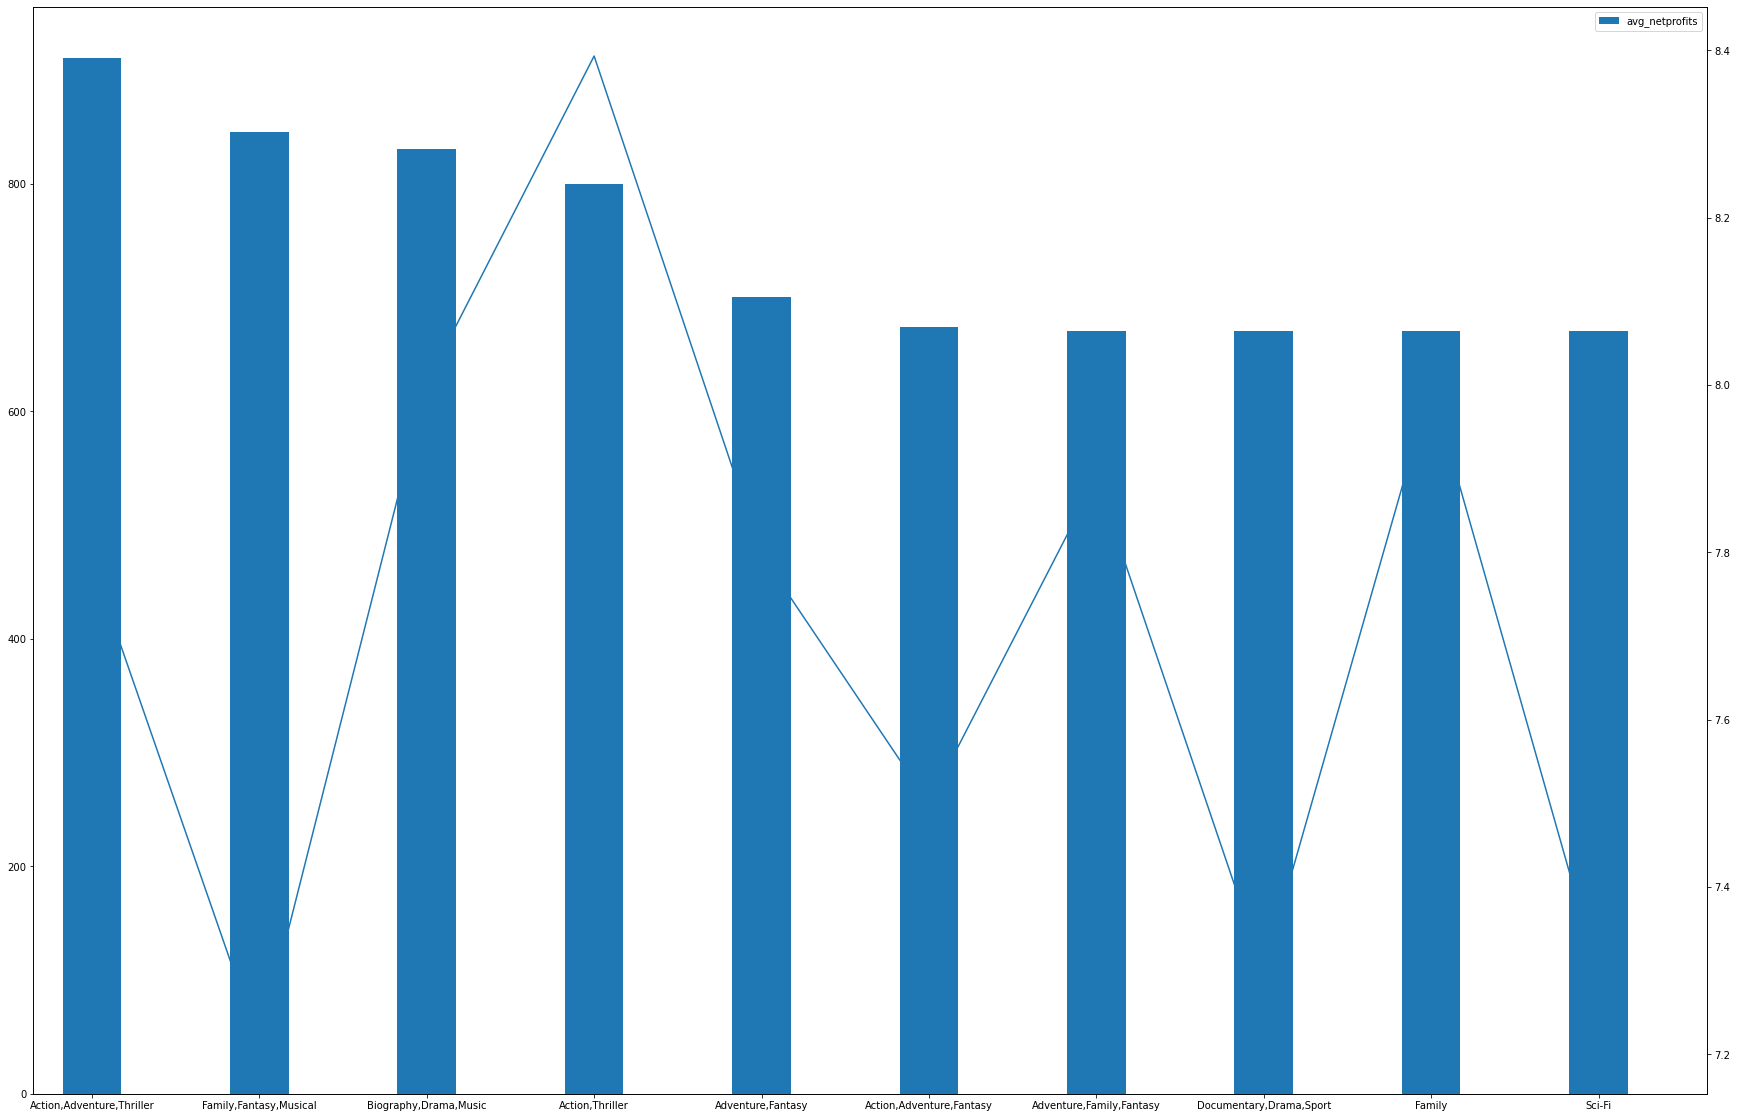

In [381]:
n_profits[['genres','avg_netprofits']].plot(kind='bar', width = 0.35, figsize = (30,20))
n_profits['avg_rating'].plot( secondary_y=True)


ax = plt.gca()
plt.xlim([-0.35, len(n_c_profits['avg_netprofits'])-0.35])
ax.set_xticklabels(n_profits['genres'])

#plt.rcParams['figure.figsize'] = (10,6)

plt.show()

### Should the movie be launched internationally?

In [382]:
n_profits

,movie_id,genres,genre1,genre2,genre3,production_budget ($ millions),avg_rating,tot_votes,netprofit ($ millions),domesticprofit ($ millions),foreignprofit ($ millions),avg_netprofits,avg_domprofits,avg_foreignprofits
0,tt1074638,"Action,Adventure,Thriller",Action,Adventure,Thriller,200,7.787873,602662,910,100,810,910.0,100.0,810.0
1,tt2771200,"Family,Fantasy,Musical",Family,Fantasy,Musical,20,7.211739,244055,590,360,230,845.0,350.0,495.0
2,tt1727824,"Biography,Drama,Music",Biography,Drama,Music,60,8.002161,353095,830,160,670,830.0,160.0,670.0
3,tt1345836,"Action,Thriller",Action,Thriller,NA,280,8.393042,1401702,800,170,630,800.0,170.0,630.0
4,tt1170358,"Adventure,Fantasy",Adventure,Fantasy,NA,250,7.797300,573302,710,10,700,700.0,10.0,690.0
5,tt0451279,"Action,Adventure,Fantasy",Action,Adventure,Fantasy,150,7.499888,487561,670,260,410,674.0,168.0,506.0
6,tt0903624,"Adventure,Family,Fantasy",Adventure,Family,Fantasy,250,7.888447,731705,770,50,720,670.0,50.0,620.0
7,tt4283448,"Documentary,Drama,Sport",Documentary,Drama,Sport,150,7.299587,12579,670,260,410,670.0,260.0,410.0
8,tt2071483,Family,Family,NA,NA,180,7.999174,12706,670,180,490,670.0,180.0,490.0
9,tt4028068,Sci-Fi,Sci-Fi,NA,NA,150,7.295074,12586,670,260,410,670.0,260.0,410.0


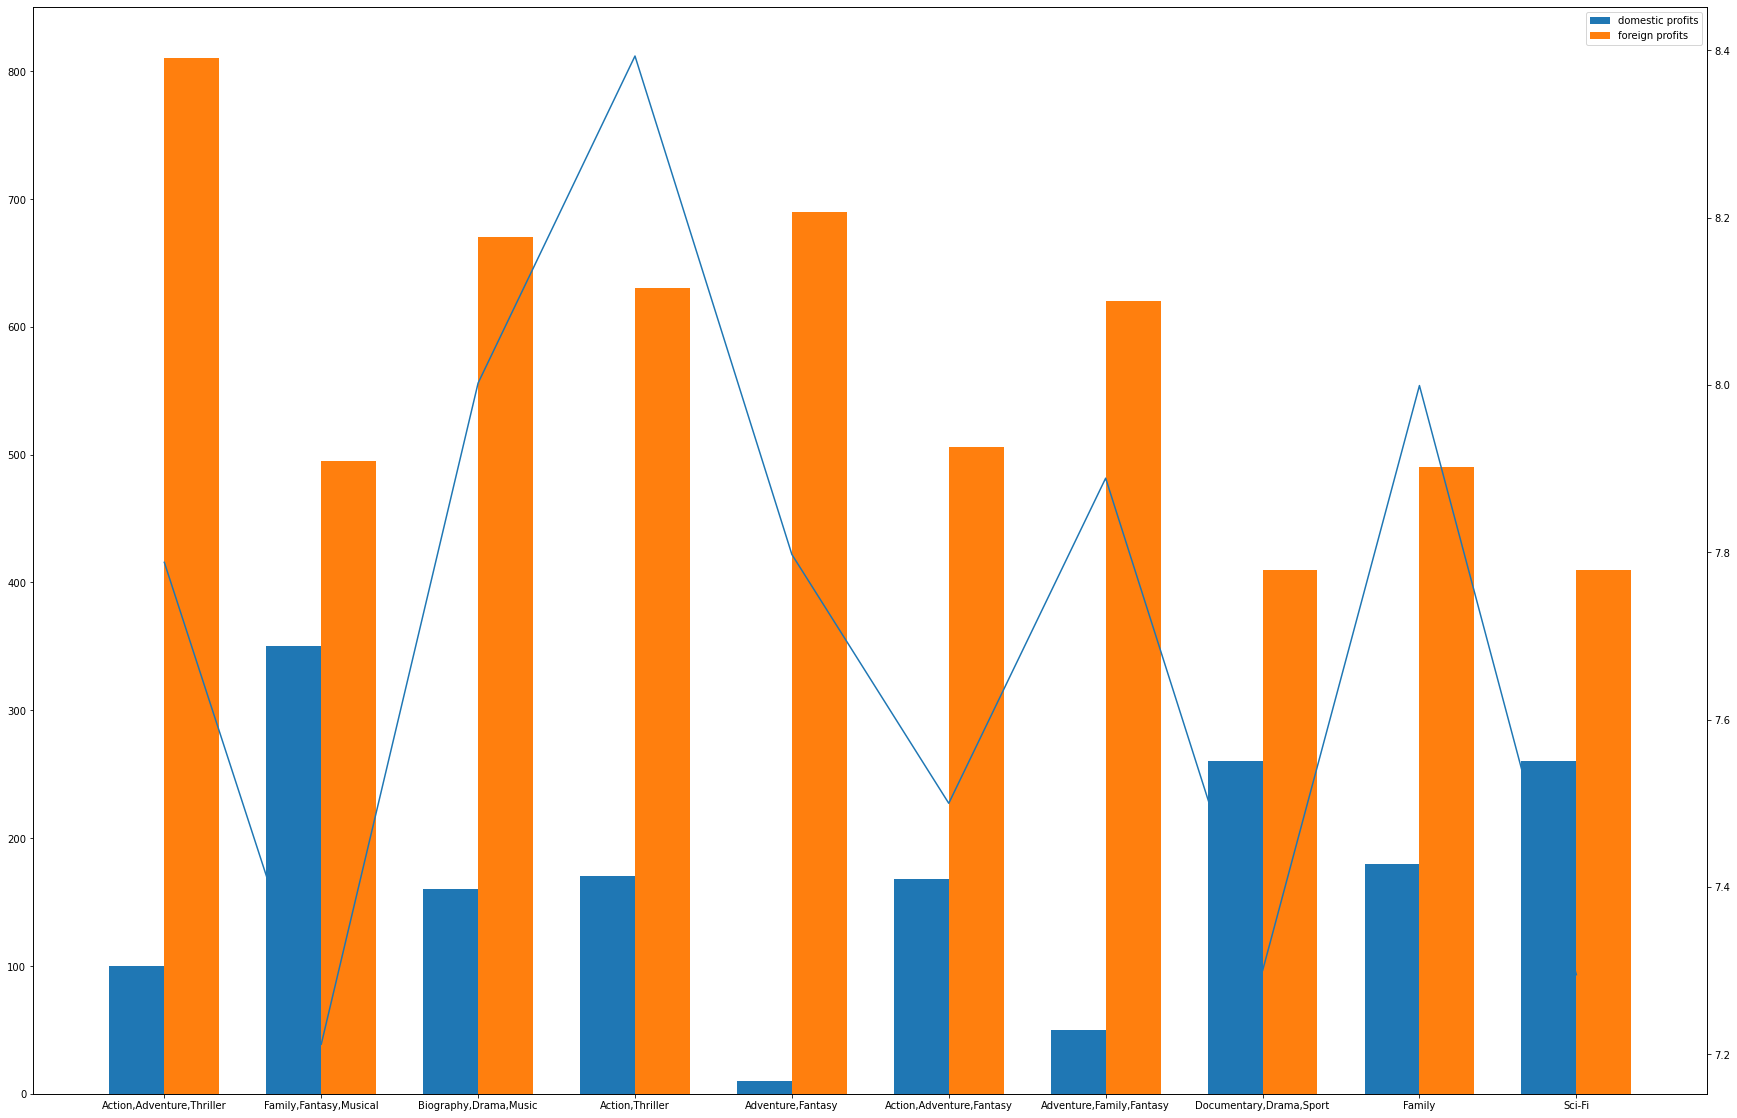

In [383]:
width = 0.35

fig, ax = plt.subplots(figsize=(30,20));

x = np.arange(10)

ax.bar(x-width/2, n_profits['avg_domprofits'], width, label='domestic profits');
ax.bar(x+width/2, n_profits['avg_foreignprofits'], width, label='foreign profits');
n_profits['avg_rating'].plot( secondary_y=True);

plt.xticks(x,n_profits['genres'])
ax.legend();

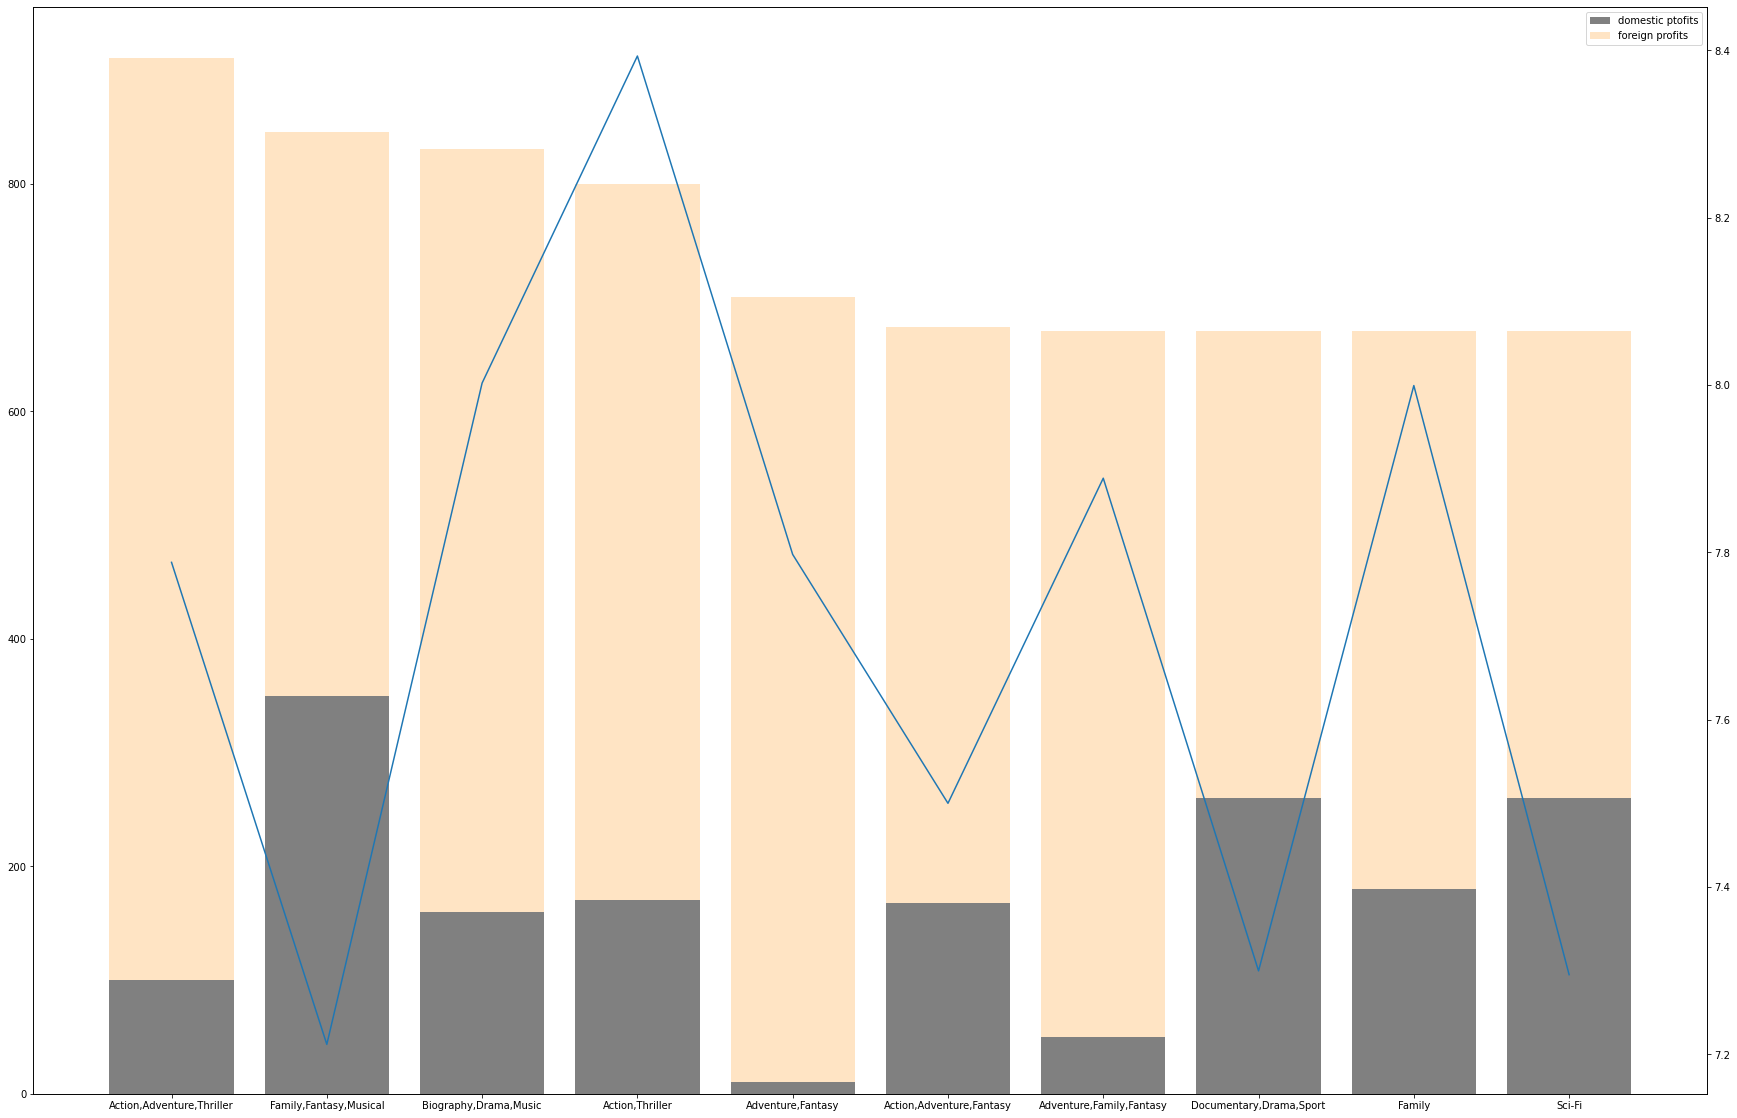

In [384]:
width = 0.35

fig, ax = plt.subplots(figsize=(30,20));

x = np.arange(10)

plt.bar(n_profits['genres'], n_profits['avg_domprofits'], color='grey');
plt.bar(n_profits['genres'], n_profits['avg_foreignprofits'], bottom = n_profits['avg_domprofits'],color = 'bisque');
#n_profits['avg_rating'].plot( secondary_y=True);

plt.legend(["domestic ptofits", "foreign profits"])

n_profits['avg_rating'].plot( secondary_y=True);


### What should the budget target be for the movie?

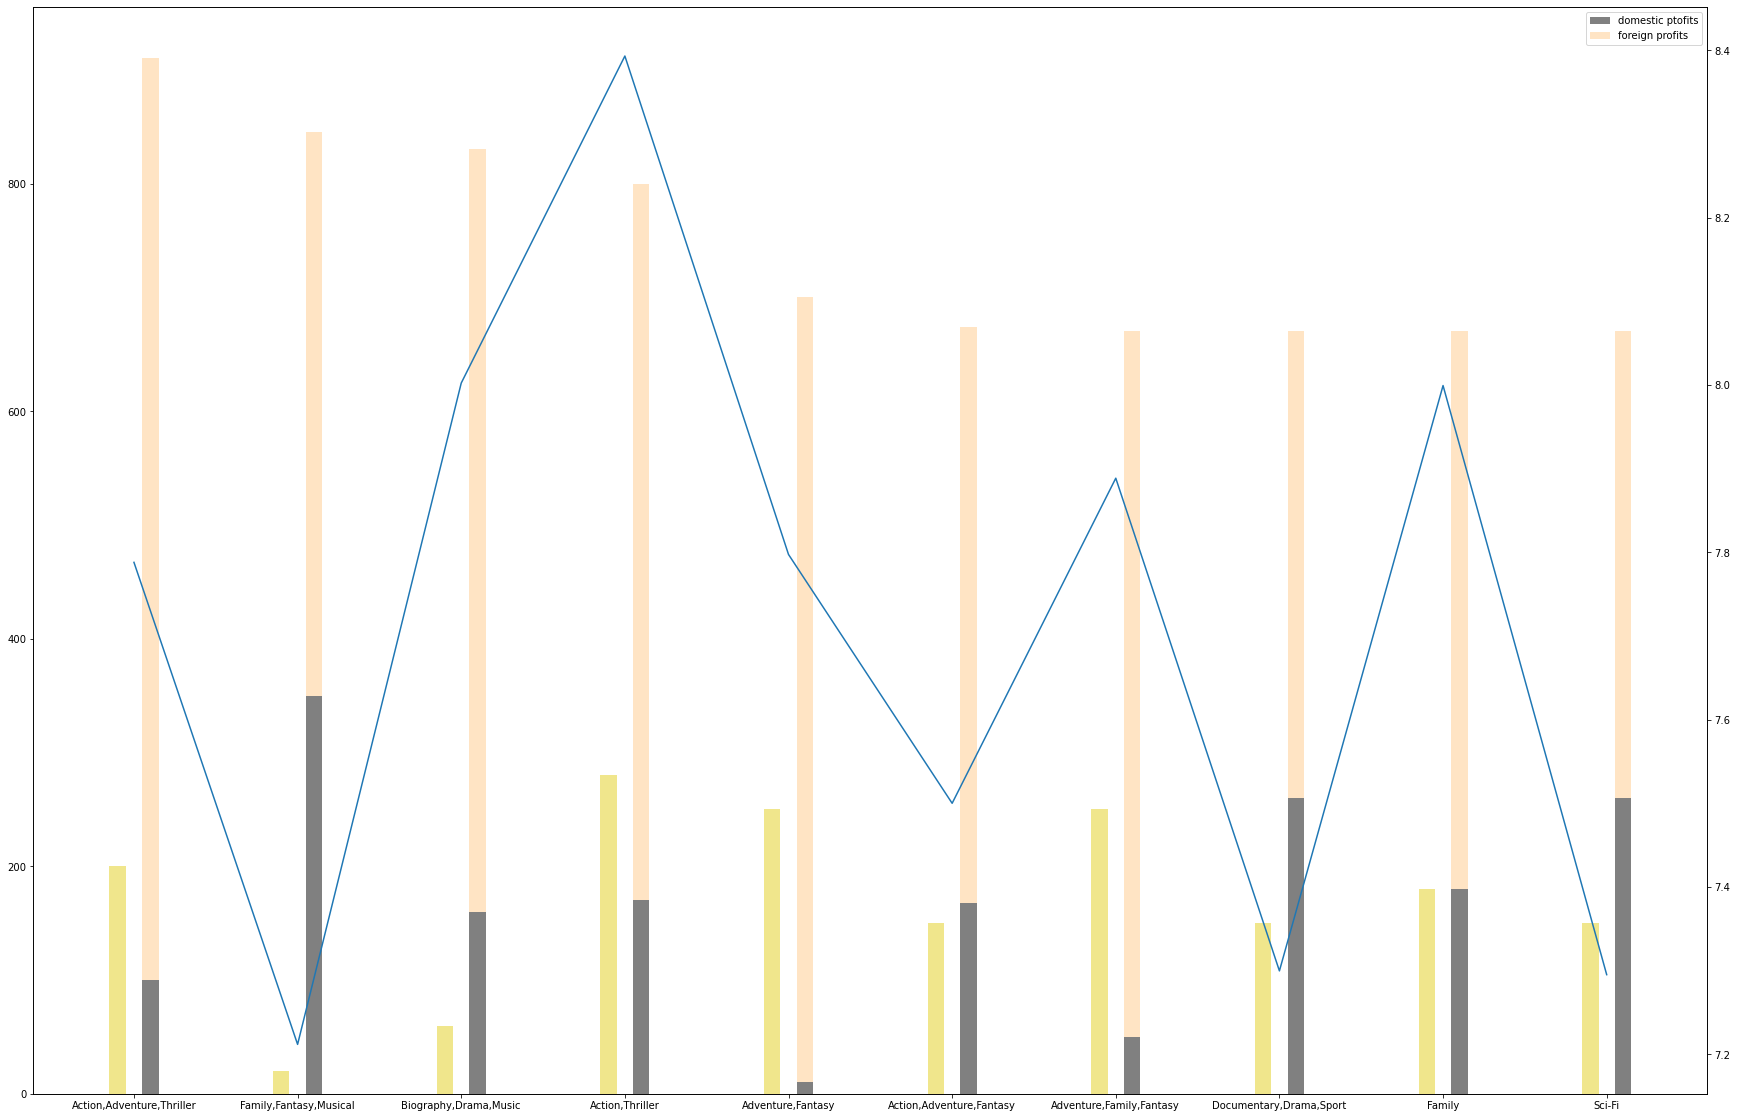

In [386]:
width = 0.1

fig, ax = plt.subplots(figsize=(30,20));

x = np.arange(10)

plt.bar(x+width, n_profits['avg_domprofits'], color='grey',width = width);
plt.bar(x+width, n_profits['avg_foreignprofits'], bottom = n_profits['avg_domprofits'],color = 'bisque',width = width);
plt.bar(x-width, n_profits['production_budget ($ millions)'], color='khaki',width = width)
#n_profits['avg_rating'].plot( secondary_y=True);

plt.legend(["domestic ptofits", "foreign profits"])
plt.xticks(x,n_profits['genres'])
n_profits['avg_rating'].plot( secondary_y=True);

## Recommendation

### Box Office Mojo

**Disregard**

In [ ]:
pd.pivot_table(brt_analysis, 
         values = brt_analysis['avg_rating'],
         index = brt_analysis['genre1'], 
         columns = [brt_analysis['genre2'],brt_analysis['genre2']])

In [ ]:
pd.pivot_table(brt_analysis, values = 'avg_rating', index = ['genre1'], columns = ['genre2', 'genre3'])

In [ ]:
pivot = pd.pivot_table(brt_analysis, values = ['avg_rating', 'tot_votes'], index = ['genre1', 'genre2', 'genre3'])
pivot

In [ ]:
pivot.sort_values(by='avg_rating', ascending = False)

In [ ]:
pivot = pivot[pivot['avg_rating'] >=7.5]
pivot.sort_values(by='avg_rating', ascending = False, inplace=True)
pivot

In [ ]:
# previewing the data and info
print(bom_df.info(), '\n')

bom_df.head()

There are a few missing values in the `studio`, `domestic_gross`, and `foreign_gross` columns.

Lets start with looking at whether any movies have *10* for `foreign_gross`

In [ ]:
bom_df['foreign_gross'].value_counts()

Looks like it doesn't have any *10* values. For now, we will replace the missing records in that column with *10*. We will later merge these records with the **The Numbers** dataset which should help us fill in these records.

If we run into a record that is not common between the two and has a *10* for `foreign_gross`, we will drop that record.

In [ ]:
# create a copy
bom = bom_df.copy()

#replace None values in foreign_gross column
bom['foreign_gross'] = bom['foreign_gross'].fillna(0)

#preview info
bom.info()

Now drop all other records with missing data.

In [ ]:
bom.dropna(inplace=True)

#preview the info
bom.info()

Lets change the data type of the `gross` columns to integers and make it better to read by reducing the number of significant figures in the table. 

We should also add the **$** sign in the column names to show what currency we are talking about.

In [ ]:
#changing the datatype to integer
bom['foreign_gross'] = bom['foreign_gross'].astype(str).str.replace(',','').astype(float).astype('int64')
bom['domestic_gross'] = bom['domestic_gross'].astype('int64')

#rounding everything
# bom['foreign_gross'] = bom['foreign_gross'].round(-8)
# bom['domestic_gross'] = bom['domestic_gross'].round(-8)

#reducing significant figures
# bom['foreign_gross'] = bom['foreign_gross'].div(1000000)
# bom['domestic_gross'] = bom['domestic_gross'].div(1000000)


#rename the columns
# bom.rename(columns = {'domestic_gross':'domestic_gross ($ millions)', 
#                       'foreign_gross' : 'foreign_gross ($ millions)' }, inplace=True)

#preview results
print(bom.info(), '\n')
bom.head()

Lets go ahead and join this with the `bom` dataframe

In [ ]:
#join bom and tn dataframes 

# q = """
# SELECT *
# FROM tn
# LEFT JOIN bom
#     USING(title)
# """

# bom_tn = pysqldf(q)

bom_tn = tn.set_index('title').join(bom.set_index('title'), how = 'outer')

#previewing the result
print(bom_tn.info())

bom_tn.head()

1. **Customer Influences:**

    It is important to understand the customer base to target and how different factors influence their behavior. This will ensure that the client produces movies that customers will be willing to invest in. Targetting the customer properly is the most important part in ensuring a thriving fan base, growing customer loyalty and having an impactful market entry. Customer saatisfaction is directly correlated with profits and better reviews which will allow long-term success.

    The factors investigated in this segment are the following:
    * Genres
    * Movie Ratings (R/PG/etc)
    * Reviews
    * Run Time
    * Initial Screening Year

1. **Customer Influences:**

    It is important to understand the customer base to target and how different factors influence their behavior. This will ensure that the client produces movies that customers will be willing to invest in. Targetting the customer properly is the most important part in ensuring a thriving fan base, growing customer loyalty and having an impactful market entry. Customer saatisfaction is directly correlated with profits and better reviews which will allow long-term success.

    The factors investigated in this segment are the following:
    * Genres
    * Movie Ratings (R/PG/etc)
    * Reviews
    * Run Time
    * Initial Screening Yearbom_tn[bom_tn['foreign_gross'] == 0.0]

2. **Competition Awareness:**

    It is critical to understand the current market competition to set the client up for success. Understanding the compeition can provide insight into barriers to entry in specific genres. It can also provide an outlook on custmer acquisation potential in scenarios where there is direct compeition with another well-established movie house.
    
    The factors investigated in this segment are the following:
    * Market share by Revenue
    * Market share by Profit
    * Market share by Genre
    * Performance in local vs foreign markets

3. **Financial Impact:**

    The financial aspect of venturing into a new business an essential area to evaluate. Understanding the investment required and the expected profits can allow the client to have realistic expectations and forecasting. 
    
    The factors investigated in this segment are the following:
    * Movie Budgets
    * Net Profits
    * Rate of Return